In [ ]:
!pip install pytket

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.5/103.5 kB 11.5 MB/s eta 0:00:00


In [ ]:
!pip install lambeq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.1/152.1 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.9/144.9 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.3/364.3 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 59.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.0 MB/s eta 0:00:00


In [ ]:
from pytket.circuit.display import render_circuit_jupyter

from lambeq import AtomicType, BobcatParser, IQPAnsatz

N = AtomicType.NOUN
S = AtomicType.SENTENCE

Evaluating checksum: 0.0%|          |0.000/1.533GB [00:00<?]

Extracting model...


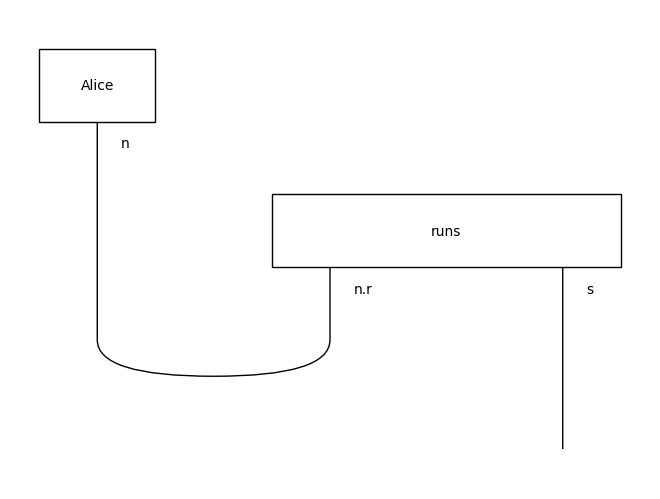

In [ ]:
parser = BobcatParser()
diagram = parser.sentence2diagram('Alice runs')
diagram.draw()

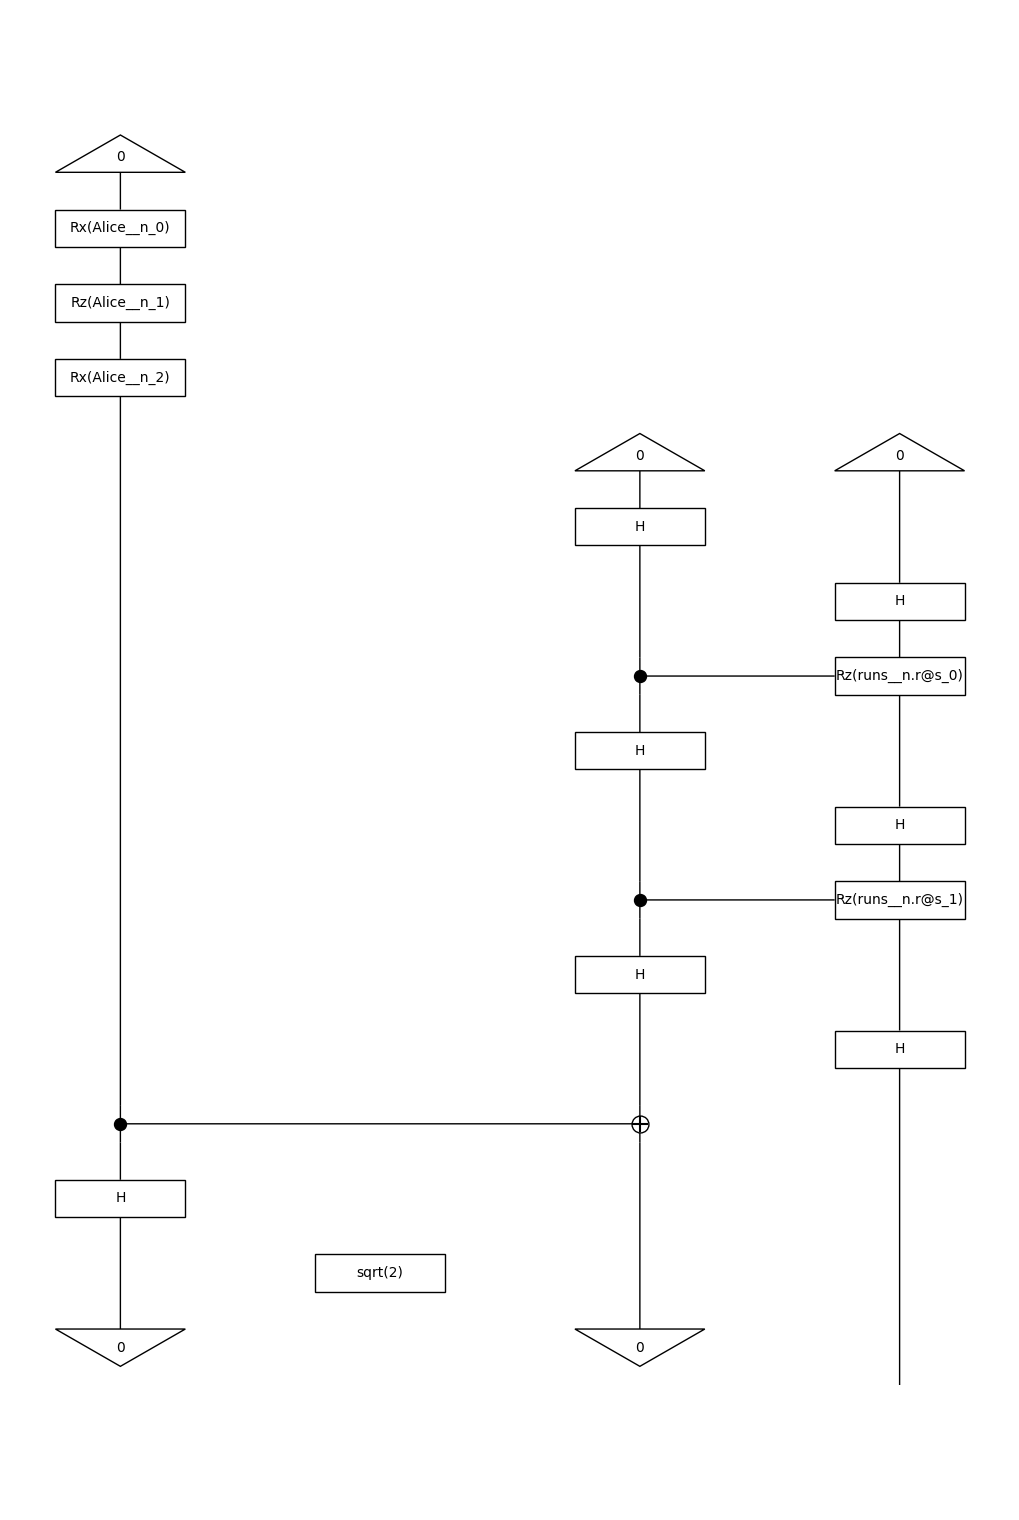

In [ ]:
ansatz = IQPAnsatz({N: 1, S: 1}, n_layers=2)
discopy_circuit = ansatz(diagram)
discopy_circuit.draw(figsize=(10, 15))

In [ ]:
tket_circuit = ansatz(diagram).to_tk()

# This does not render properly on GitHub, please view it at:
# https://cqcl.github.io/lambeq/examples/circuit.html
render_circuit_jupyter(tket_circuit)

In [ ]:
from sympy import default_sort_key

# Make sure you sort your symbols as they are returned as a set.
parameters = sorted(tket_circuit.free_symbols(), key=default_sort_key)

param_dict = {p: i * 0.001 for i, p in enumerate(parameters)}
param_dict

{Alice__n_0: 0.0,
 Alice__n_1: 0.001,
 Alice__n_2: 0.002,
 runs__n.r@s_0: 0.003,
 runs__n.r@s_1: 0.004}

In [ ]:
tket_circuit.symbol_substitution(param_dict)

# This does not render properly on GitHub, please view it at:
# https://cqcl.github.io/lambeq/examples/circuit.html
render_circuit_jupyter(tket_circuit)

In [ ]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [ ]:
import torch

BATCH_SIZE = 30
EPOCHS = 25
LEARNING_RATE = 3e-2
SEED = 0

In [ ]:
def read_data(filename):
    labels, sentences = [], []
    with open(filename) as f:
        for line in f:
            t = float(line[0])
            labels.append([t, 1-t])
            sentences.append(line[1:].strip())
    return labels, sentences


train_labels, train_data = read_data('mc_train_data.txt')
dev_labels, dev_data = read_data('mc_dev_data.txt')
test_labels, test_data = read_data('mc_test_data.txt')

In [ ]:
from lambeq import BobcatParser

reader = BobcatParser(verbose='text')

train_diagrams = reader.sentences2diagrams(train_data)
dev_diagrams = reader.sentences2diagrams(dev_data)
test_diagrams = reader.sentences2diagrams(test_data)

Tagging sentences.
Parsing tagged sentences.
Turning parse trees to diagrams.
Tagging sentences.
Parsing tagged sentences.
Turning parse trees to diagrams.
Tagging sentences.
Parsing tagged sentences.
Turning parse trees to diagrams.


In [ ]:
!pip install discopy

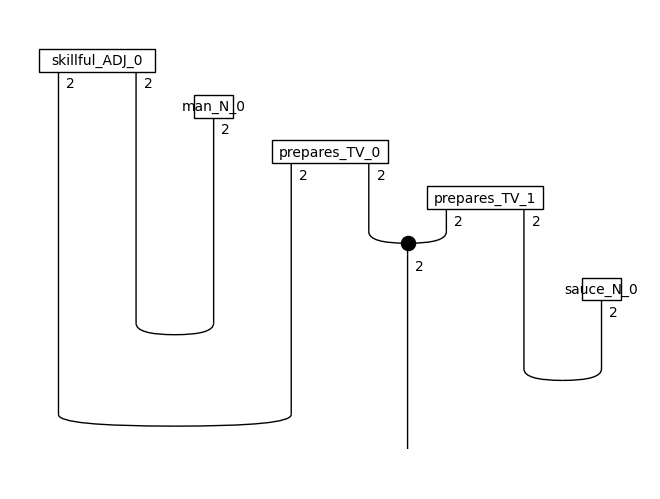

In [ ]:
from discopy.tensor import Dim

from lambeq import AtomicType, SpiderAnsatz

ansatz = SpiderAnsatz({AtomicType.NOUN: Dim(2),
                       AtomicType.SENTENCE: Dim(2)})

train_circuits = [ansatz(diagram) for diagram in train_diagrams]
dev_circuits =  [ansatz(diagram) for diagram in dev_diagrams]
test_circuits = [ansatz(diagram) for diagram in test_diagrams]

train_circuits[0].draw()

In [ ]:
from lambeq import PytorchModel
all_circuits = train_circuits + dev_circuits + test_circuits
model = PytorchModel.from_diagrams(all_circuits)

In [ ]:
sig = torch.sigmoid

def accuracy(y_hat, y):
    return torch.sum(torch.eq(torch.round(sig(y_hat)), y))/len(y)/2  # half due to double-counting

In [ ]:
from lambeq import PytorchTrainer

trainer = PytorchTrainer(
        model=model,
        loss_function=torch.nn.BCEWithLogitsLoss(),
        optimizer=torch.optim.AdamW,    # type: ignore
        learning_rate=LEARNING_RATE,
        epochs=EPOCHS,
        evaluate_functions={"acc": accuracy},
        evaluate_on_train=True,
        verbose='text',
        seed=SEED)

In [ ]:
from lambeq import Dataset

train_dataset = Dataset(
            train_circuits,
            train_labels,
            batch_size=BATCH_SIZE)

dev_dataset = Dataset(dev_circuits, dev_labels)

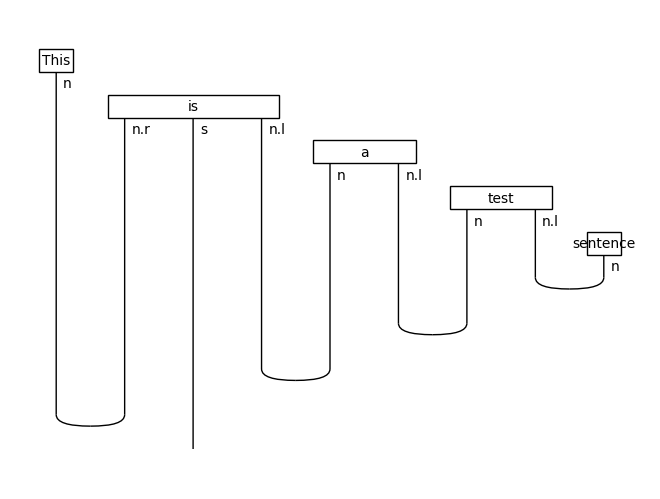

In [ ]:
from lambeq import BobcatParser

parser = BobcatParser()
diagram = parser.sentence2diagram('This is a test sentence')
diagram.draw()

In [ ]:
from lambeq.pregroups import draw

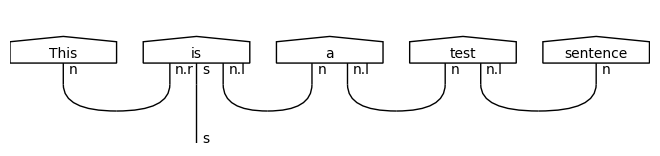

In [ ]:


draw(diagram)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [ ]:
import numpy as np

BATCH_SIZE = 30
EPOCHS = 120
SEED = 2

In [ ]:
def read_data(filename):
    labels, sentences = [], []
    with open(filename) as f:
        for line in f:
            t = int(line[0])
            labels.append([t, 1-t])
            sentences.append(line[1:].strip())
    return labels, sentences


train_labels, train_data = read_data('mc_train_data.txt')
dev_labels, dev_data = read_data('mc_dev_data.txt')
test_labels, test_data = read_data('mc_test_data.txt')

In [ ]:
from lambeq import BobcatParser

parser = BobcatParser(verbose='text')

raw_train_diagrams = parser.sentences2diagrams(train_data)
raw_dev_diagrams = parser.sentences2diagrams(dev_data)
raw_test_diagrams = parser.sentences2diagrams(test_data)

Tagging sentences.
Parsing tagged sentences.
Turning parse trees to diagrams.
Tagging sentences.
Parsing tagged sentences.
Turning parse trees to diagrams.
Tagging sentences.
Parsing tagged sentences.
Turning parse trees to diagrams.


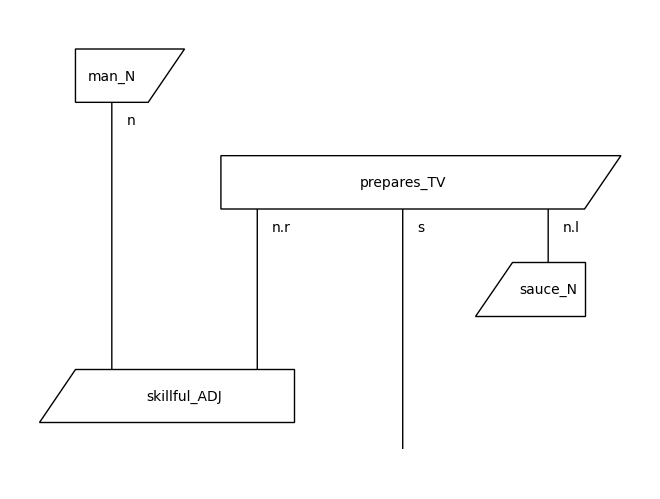

In [ ]:
from lambeq import remove_cups

train_diagrams = [remove_cups(diagram) for diagram in raw_train_diagrams]
dev_diagrams = [remove_cups(diagram) for diagram in raw_dev_diagrams]
test_diagrams = [remove_cups(diagram) for diagram in raw_test_diagrams]

train_diagrams[0].draw()

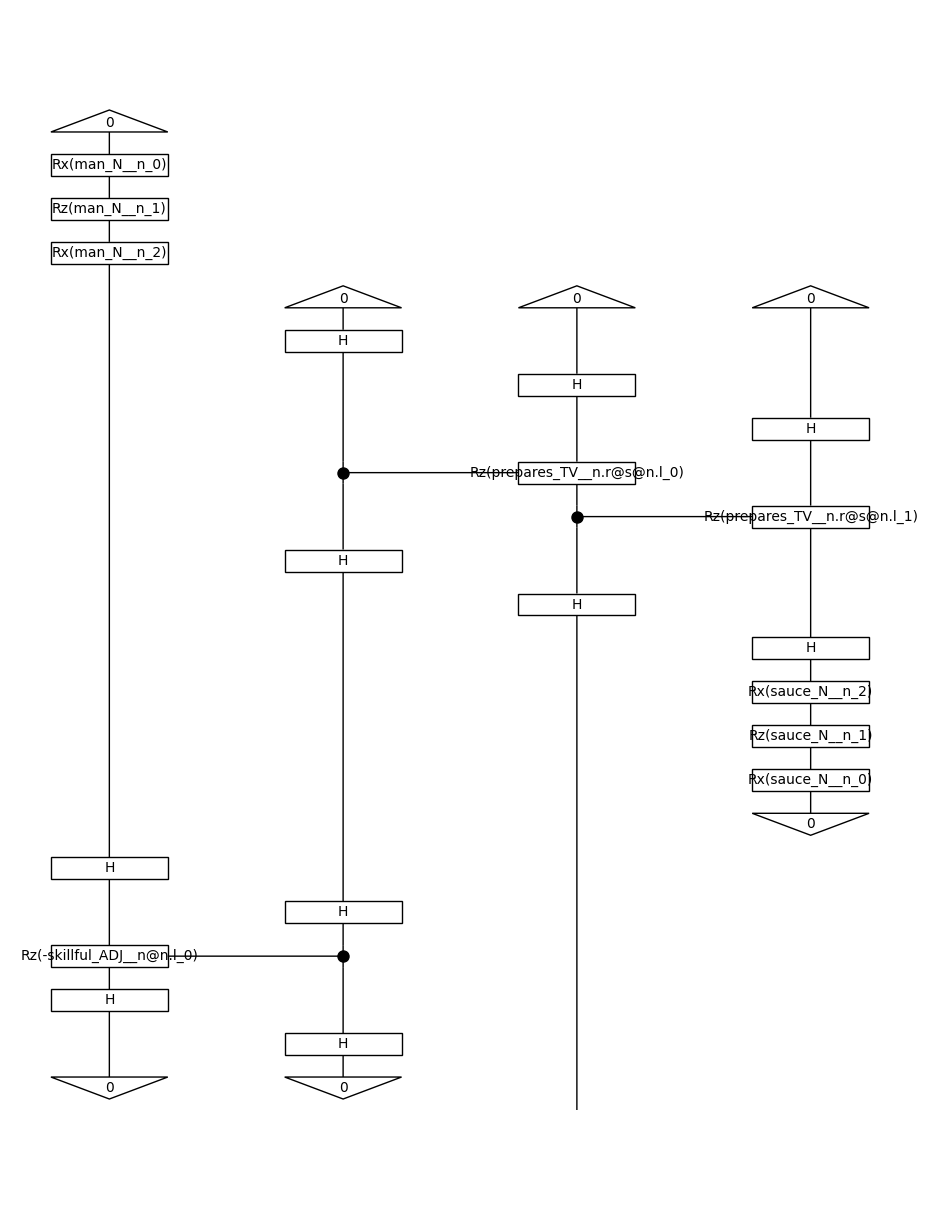

In [ ]:
from lambeq import AtomicType, IQPAnsatz

ansatz = IQPAnsatz({AtomicType.NOUN: 1, AtomicType.SENTENCE: 1},
                   n_layers=1, n_single_qubit_params=3)

train_circuits = [ansatz(diagram) for diagram in train_diagrams]
dev_circuits =  [ansatz(diagram) for diagram in dev_diagrams]
test_circuits = [ansatz(diagram) for diagram in test_diagrams]

train_circuits[0].draw(figsize=(9, 12))

In [ ]:
!pip install pytket-qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 621.0 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.0/128.0 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.2/235.2 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 44.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [ ]:
from pytket.extensions.qiskit import AerBackend
from lambeq import TketModel

all_circuits = train_circuits+dev_circuits+test_circuits

backend = AerBackend()
backend_config = {
    'backend': backend,
    'compilation': backend.default_compilation_pass(2),
    'shots': 8192
}
model = TketModel.from_diagrams(all_circuits, backend_config=backend_config)

In [ ]:
loss = lambda y_hat, y: -np.sum(y * np.log(y_hat)) / len(y)  # binary cross-entropy loss
acc = lambda y_hat, y: np.sum(np.round(y_hat) == y) / len(y) / 2  # half due to double-counting

In [ ]:
from lambeq import QuantumTrainer, SPSAOptimizer

trainer = QuantumTrainer(
    model,
    loss_function=loss,
    epochs=EPOCHS,
    optimizer=SPSAOptimizer,
    optim_hyperparams={'a': 0.05, 'c': 0.06, 'A':0.01*EPOCHS},
    evaluate_functions={'acc': acc},
    evaluate_on_train=True,
    verbose = 'text',
    seed=0
)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [ ]:
import numpy as np

BATCH_SIZE = 30
LEARNING_RATE = 3e-2
EPOCHS = 120
SEED = 0

In [ ]:
def read_data(filename):
    labels, sentences = [], []
    with open(filename) as f:
        for line in f:
            t = int(line[0])
            labels.append([t, 1-t])
            sentences.append(line[1:].strip())
    return labels, sentences


train_labels, train_data = read_data('mc_train_data.txt')
dev_labels, dev_data = read_data('mc_dev_data.txt')
test_labels, test_data = read_data('mc_test_data.txt')

In [ ]:
from lambeq import BobcatParser

parser = BobcatParser(verbose='text')

raw_train_diagrams = parser.sentences2diagrams(train_data)
raw_dev_diagrams = parser.sentences2diagrams(dev_data)
raw_test_diagrams = parser.sentences2diagrams(test_data)

Tagging sentences.
Parsing tagged sentences.
Turning parse trees to diagrams.
Tagging sentences.
Parsing tagged sentences.
Turning parse trees to diagrams.
Tagging sentences.
Parsing tagged sentences.
Turning parse trees to diagrams.


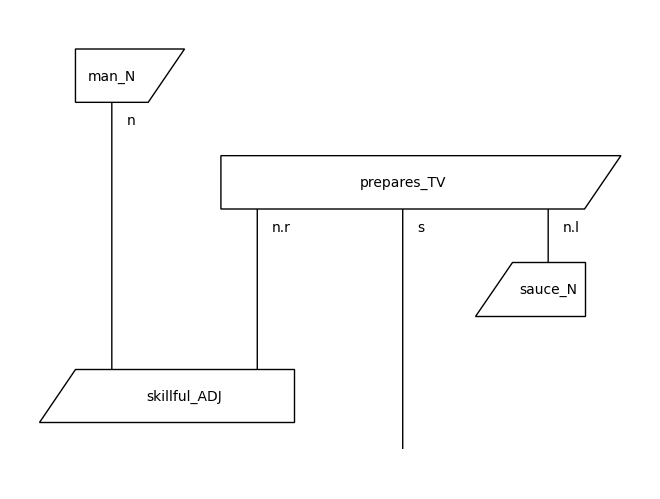

In [ ]:
from lambeq import remove_cups

train_diagrams = [remove_cups(diagram) for diagram in raw_train_diagrams]
dev_diagrams = [remove_cups(diagram) for diagram in raw_dev_diagrams]
test_diagrams = [remove_cups(diagram) for diagram in raw_test_diagrams]

train_diagrams[0].draw()

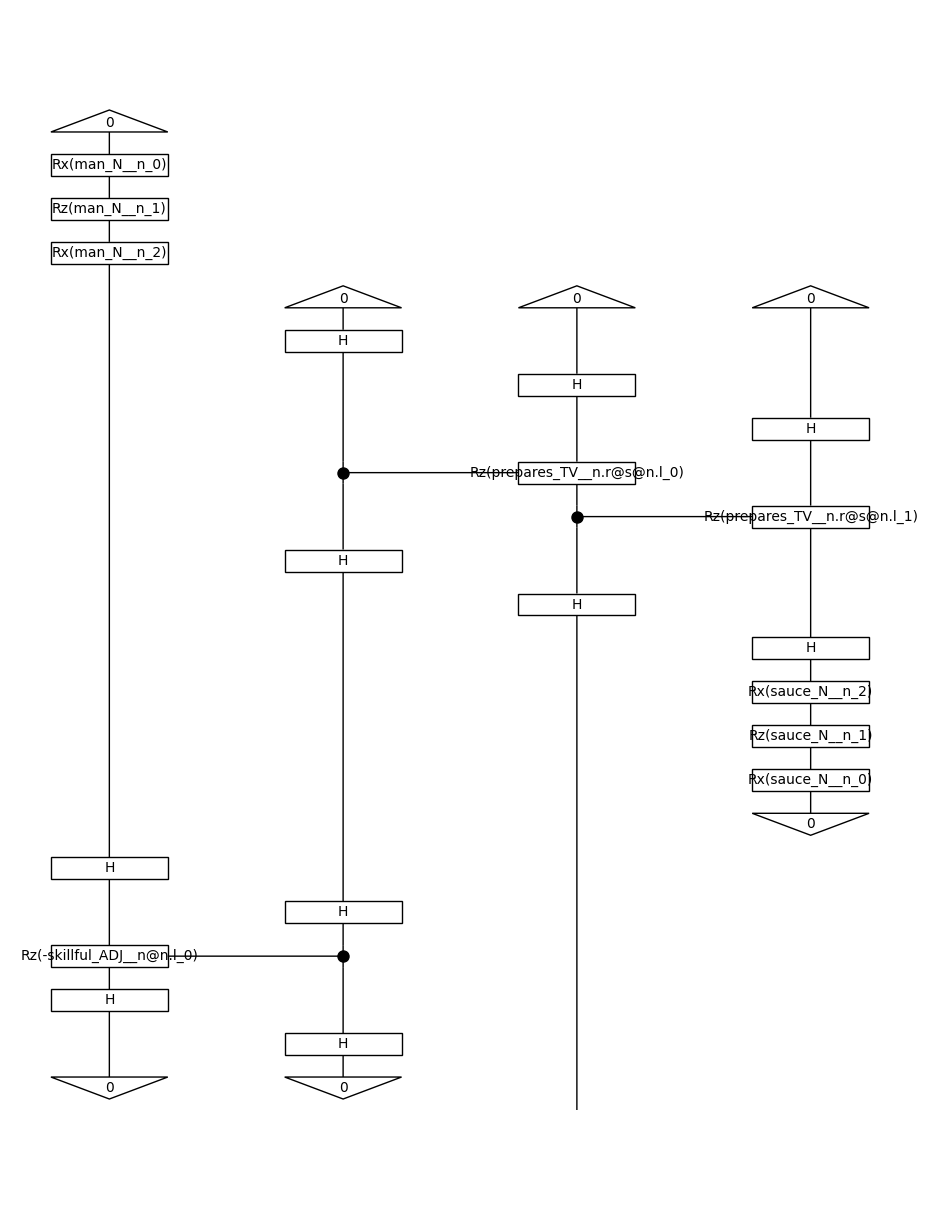

In [ ]:
from lambeq import AtomicType, IQPAnsatz

ansatz = IQPAnsatz({AtomicType.NOUN: 1, AtomicType.SENTENCE: 1},
                   n_layers=1, n_single_qubit_params=3)

train_circuits = [ansatz(diagram) for diagram in train_diagrams]
dev_circuits =  [ansatz(diagram) for diagram in dev_diagrams]
test_circuits = [ansatz(diagram) for diagram in test_diagrams]

train_circuits[0].draw(figsize=(9, 12))

In [ ]:
from lambeq import NumpyModel

all_circuits = train_circuits + dev_circuits + test_circuits

model = NumpyModel.from_diagrams(all_circuits, use_jit=True)

In [ ]:
loss = lambda y_hat, y: -np.sum(y * np.log(y_hat)) / len(y)  # binary cross-entropy loss
acc = lambda y_hat, y: np.sum(np.round(y_hat) == y) / len(y) / 2  # half due to double-counting

In [ ]:
from lambeq import QuantumTrainer, SPSAOptimizer

trainer = QuantumTrainer(
    model,
    loss_function=loss,
    epochs=EPOCHS,
    optimizer=SPSAOptimizer,
    optim_hyperparams={'a': 0.2, 'c': 0.06, 'A':0.01*EPOCHS},
    evaluate_functions={'acc': acc},
    evaluate_on_train=True,
    verbose = 'text',
    seed=0
)

In [ ]:
from lambeq import Dataset

train_dataset = Dataset(
            train_circuits,
            train_labels,
            batch_size=BATCH_SIZE)

val_dataset = Dataset(dev_circuits, dev_labels, shuffle=False)

In [ ]:
from lambeq import Reader, cups_reader, spiders_reader, stairs_reader

In [ ]:
sentence = 'This is a sentence'

In [ ]:
try:
    Reader()
except TypeError as e:
    print(e)

Can't instantiate abstract class Reader with abstract method sentence2diagram


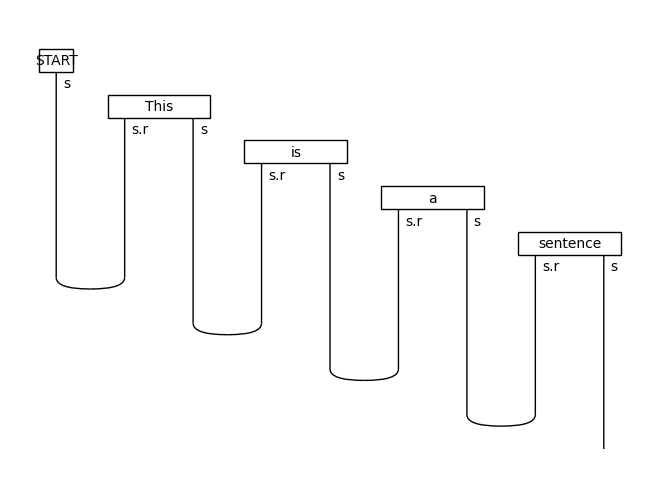

In [ ]:
cups_reader.sentence2diagram(sentence).draw()

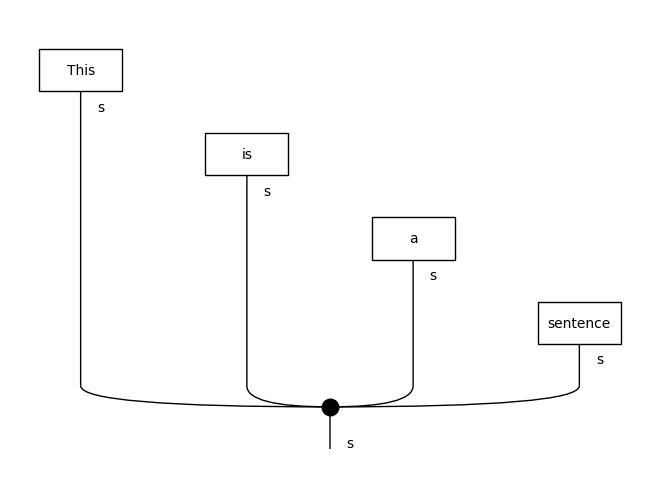

In [ ]:
spiders_reader.sentence2diagram(sentence).draw()

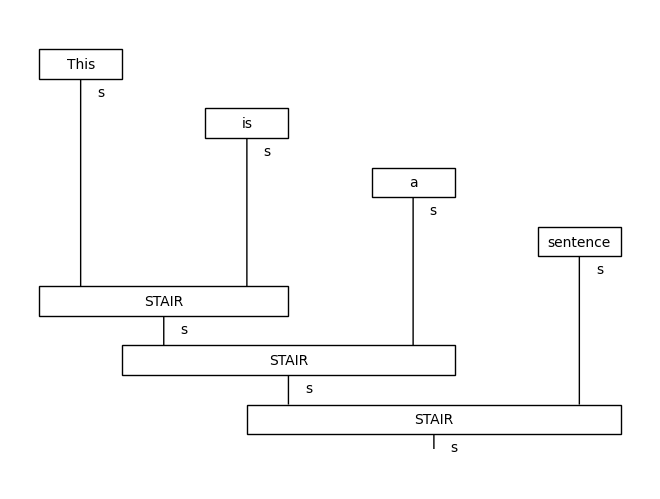

In [ ]:
stairs_reader.sentence2diagram(sentence).draw()

In [ ]:
from discopy import grammar
#from discopy.monoidal import InterchangerError

def draw(diagram):
    for i, box in enumerate(diagram.boxes):
        if isinstance(box, Word):
            for j in reversed(range(i)):
                if isinstance(diagram.boxes[j], Word):
                    break

                try:
                    diagram = diagram.interchange(j, j+1)
                except InterchangerError:
                    diagram.draw()
                    return
        elif not isinstance(box, Cup):
            diagram.draw()
            return
    grammar.draw(diagram)

In [ ]:
from discopy.grammar.pregroup import Word
from discopy.grammar.pregroup import Cup, Diagram, Id

from lambeq import AtomicType

N = AtomicType.NOUN
S = AtomicType.SENTENCE


In [ ]:
from lambeq import Rewriter

rewriter = Rewriter()

In [ ]:
import discopy

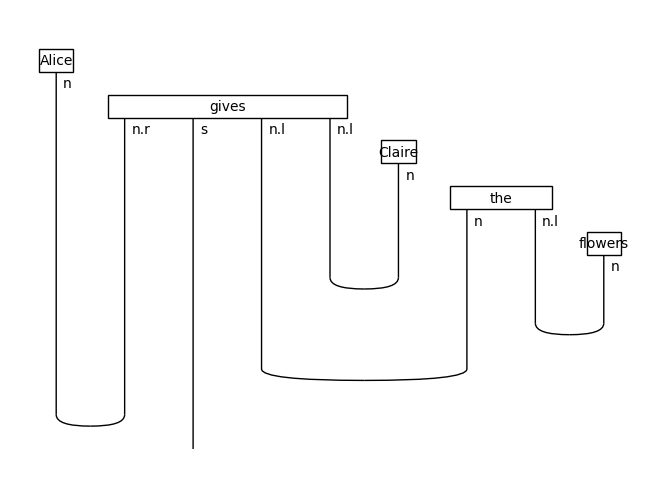

In [ ]:
from lambeq import BobcatParser

parser = BobcatParser()
diagram = parser.sentence2diagram('Alice gives Claire the flowers')
diagram.draw()

In [ ]:
from lambeq import AtomicType, MPSAnsatz, SpiderAnsatz, TensorAnsatz
from discopy.tensor import Dim

N = AtomicType.NOUN
S = AtomicType.SENTENCE

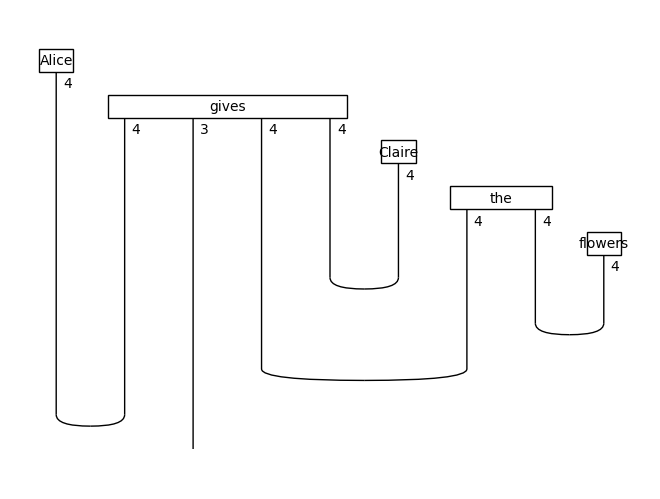

In [ ]:
TensorAnsatz({N: Dim(4), S: Dim(3)})(diagram).draw()

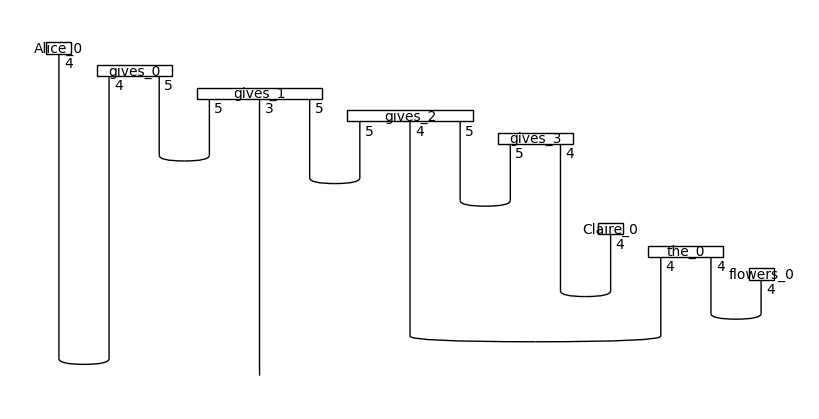

In [ ]:
MPSAnsatz({N: Dim(4), S: Dim(3)}, bond_dim=5)(diagram).draw(figsize=(8, 4))

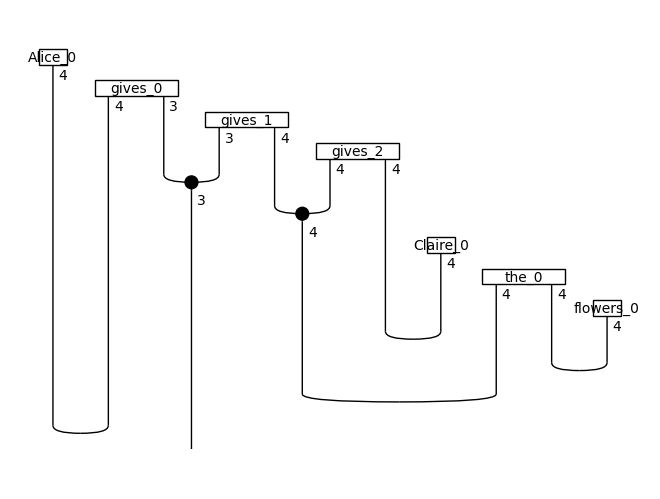

In [ ]:
SpiderAnsatz({N: Dim(4), S: Dim(3)})(diagram).draw()

In [ ]:
import torch as th
from sympy import default_sort_key

d = SpiderAnsatz({N: Dim(4), S: Dim(3)}, max_order=2)(diagram)

syms = sorted(d.free_symbols, key=default_sort_key)
sym_dict = {k: th.ones(k.size) for k in syms}
subbed_diagram = d.lambdify(*syms)(*sym_dict.values())

In [ ]:
import tensornetwork as tn
subbed_diagram.eval(contractor=tn.contractors.auto)

Tensor[int]([256, 256, 256], dom=Dim(1), cod=Dim(3))

In [ ]:
from lambeq import BobcatParser, TreeReader, TreeReaderMode

In [ ]:
sentence = 'John walks in the park.'

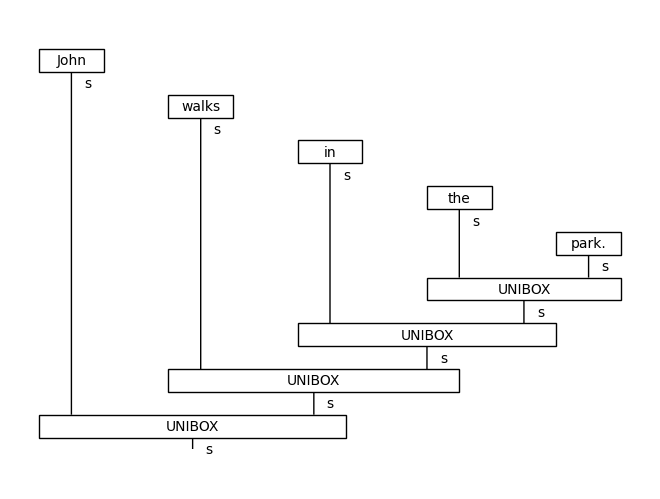

In [ ]:
reader = TreeReader(ccg_parser=BobcatParser, mode = TreeReaderMode.NO_TYPE)
reader.sentence2diagram(sentence=sentence).draw()

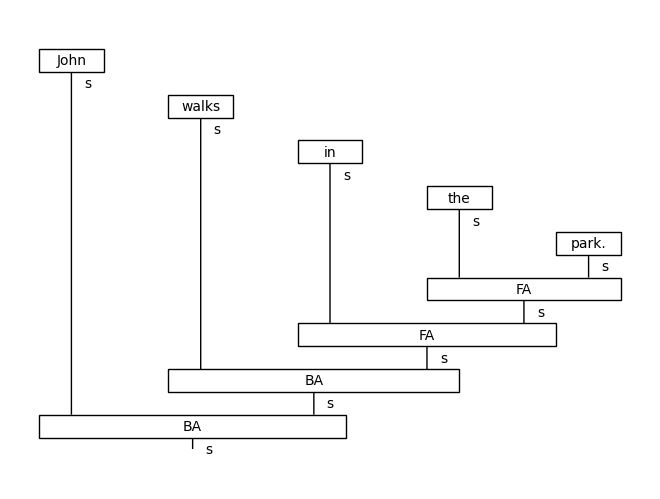

In [ ]:
reader = TreeReader(ccg_parser=BobcatParser, mode=TreeReaderMode.RULE_ONLY)
reader.sentence2diagram(sentence).draw()

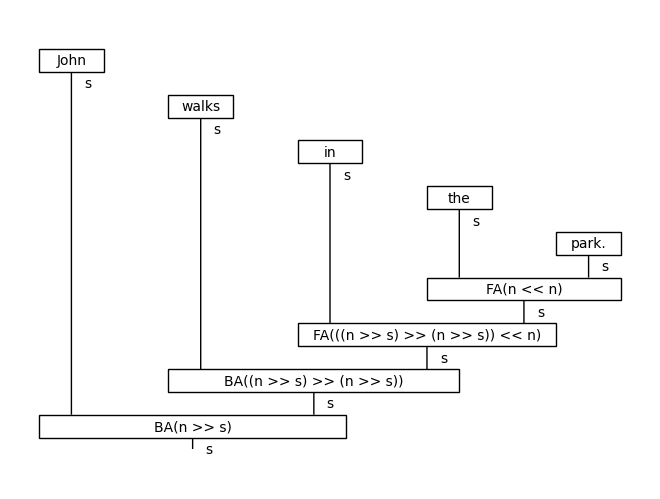

In [ ]:
reader = TreeReader(ccg_parser=BobcatParser, mode=TreeReaderMode.RULE_TYPE)
reader.sentence2diagram(sentence).draw()


In [ ]:
import warnings

warnings.filterwarnings("ignore")
import os
import numpy as np
import pandas as pd

os.environ["TOKENIZERS_PARALLELISM"] = "false"
import json
import time
from sklearn.model_selection import train_test_split
from lambeq import (
    remove_cups,
    Rewriter,
    AtomicType,
    IQPAnsatz,
    Dataset,
    TketModel,
    QuantumTrainer,
    SPSAOptimizer,
    BobcatParser,
)
from discopy.tensor import Dim
from copy import copy
from pytket.extensions.qiskit import AerBackend

In [ ]:
def conv_labels_2d(y: list):
    target = []
    for y_i in y:
        if y_i == 0:
            target.append([1, 0])
        else:
            target.append([0, 1])
    return target


df = pd.read_csv("low_complexity.csv")


# filter neutral instances to achieve binary classification
filter_labels = df["label"].apply(lambda x: x in [0, 2])
labels_idx = filter_labels[filter_labels == True].index
df_bin = df[df.index.isin(labels_idx)]

# train test split
X_train, X_test, y_train, y_test = train_test_split(
    df_bin["text"], df_bin["label"], test_size=0.2, random_state=42
)
# train val split
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42
)

X_train = X_train.to_list()
X_val = X_val.to_list()
X_test = X_test.to_list()
y_train = y_train.to_list()
y_val = y_val.to_list()
y_test = y_test.to_list()

y_train = conv_labels_2d(y_train)
y_val = conv_labels_2d(y_val)
y_test = conv_labels_2d(y_test)

In [ ]:
print(np.shape(y_train), np.shape(y_val), np.shape(y_test))

(620, 2) (69, 2) (173, 2)


In [ ]:
parser = BobcatParser(verbose='text')

raw_train_diagrams = parser.sentences2diagrams(X_train, suppress_exceptions=True)
raw_val_diagrams = parser.sentences2diagrams(X_val, suppress_exceptions=True)
raw_test_diagrams = parser.sentences2diagrams(X_test, suppress_exceptions=True)

Tagging sentences.
Parsing tagged sentences.
Turning parse trees to diagrams.
Tagging sentences.
Parsing tagged sentences.
Turning parse trees to diagrams.
Tagging sentences.
Parsing tagged sentences.
Turning parse trees to diagrams.


In [ ]:
def find_indices(list_to_check, item_to_find):
    indices = []
    for idx, value in enumerate(list_to_check):
        if value == item_to_find:
            indices.append(idx)
    return indices

if None in raw_train_diagrams or None in raw_val_diagrams or None in raw_test_diagrams:
    print("Errors while parsing.")
    train_error_sent_idx = find_indices(raw_train_diagrams, None)
    val_error_sent_idx = find_indices(raw_val_diagrams, None)
    test_error_sent_idx = find_indices(raw_test_diagrams, None)

    # filter errors
    raw_train_diagrams = list(filter(lambda x : x is not None, raw_train_diagrams))
    raw_val_diagrams = list(filter(lambda x : x is not None, raw_val_diagrams))
    raw_test_diagrams = list(filter(lambda x : x is not None, raw_test_diagrams))

    # remove errors from target
    y_train = [target for idx, target in enumerate(y_train) if idx not in train_error_sent_idx]
    y_val = [target for idx, target in enumerate(y_val) if idx not in val_error_sent_idx]
    y_test = [target for idx, target in enumerate(y_test) if idx not in test_error_sent_idx]
else:
    print("No errors while parsing.")

Errors while parsing.


In [ ]:
train_diagrams = [remove_cups(diagram) for diagram in raw_train_diagrams]
val_diagrams = [remove_cups(diagram) for diagram in raw_val_diagrams]
test_diagrams = [remove_cups(diagram) for diagram in raw_test_diagrams]

In [ ]:
rewriter = Rewriter(["prepositional_phrase"])

# experimental
rew_train_diagrams = [rewriter(diag).normal_form() for diag in train_diagrams]
rew_val_diagrams = [rewriter(diag).normal_form() for diag in val_diagrams]
rew_test_diagrams = [rewriter(diag).normal_form() for diag in test_diagrams]

In [ ]:
ansatz = IQPAnsatz(
    {AtomicType.NOUN: 1, AtomicType.SENTENCE: 1, AtomicType.PREPOSITIONAL_PHRASE: 1},
    n_layers=1,
    n_single_qubit_params=3,
)


def create_circuits(diagrams: list, targets: list):
    circuits = []
    filtered_targets = []
    for i, diagram in enumerate(diagrams):
        try:
            circuits.append(ansatz(diagram))
            filtered_targets.append(targets[i])
        except ValueError as e:
            print(e)
            print(i)
    return circuits, filtered_targets


train_circuits, y_train_f = create_circuits(rew_train_diagrams, y_train)
val_circuits, y_val_f = create_circuits(rew_val_diagrams, y_val)
test_circuits, y_test_f = create_circuits(rew_test_diagrams, y_test)

In [ ]:
all_circuits = train_circuits + val_circuits + test_circuits

backend = AerBackend(simulation_method="statevector")
backend_config = {
    "backend": backend,
    "compilation": backend.default_compilation_pass(2),
    "shots": 1000,
}
model = TketModel.from_diagrams(all_circuits, backend_config=backend_config)

In [ ]:
loss = lambda y_hat, y: -np.sum(y * np.log(y_hat)) / len(y)  # binary cross-entropy loss


def acc(y_hat, y):
    return np.sum(np.round(y_hat) == y) / len(y) / 2  # half due to double-counting

metrics = {"acc": acc}

In [ ]:
EPOCHS = 2

params = {
    "a": 0.00001,  # learning rate
    "c": 0.06,  # parameter shift scaling factor
    "A": 0.01 * EPOCHS,  # stability constant
}


trainer = QuantumTrainer(
    model,
    loss_function=loss,
    epochs=EPOCHS,
    optimizer=SPSAOptimizer,
    optim_hyperparams=params,
    evaluate_functions=metrics,
    evaluate_on_train=True,
    verbose="text",
)

In [ ]:
BATCH_SIZE = 32

train_dataset = Dataset(train_circuits, y_train_f, batch_size=BATCH_SIZE)
val_dataset = Dataset(val_circuits, y_val_f, shuffle=False)

In [ ]:
!pip install nltk

In [ ]:
!pip install gensim

In [ ]:
from DataGenerate import *

word_pairs, word_pairs_annotations = GetWordPairs()
word_list = GetWords()

print("First 5 Word Pairs: ")
print(word_pairs[:5])

print("\nFirst 5 Words: ")
word_list[:5]

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


First 5 Word Pairs: 
[['party', 'government'], ['official', 'leader'], ['state', 'government'], ['control', 'intervention'], ['tax', 'interest']]

First 5 Words: 


['development', 'plan', 'action', 'training', 'education']

In [ ]:
from Models import BertEncodingWords

bert = BertEncodingWords()
def evaluateWordPair(bert, row_numbers):
	sents_to_evaluate = [bert.preprocessSentence(word_pairs[row_numbers[0]]), bert.preprocessSentence(word_pairs[row_numbers[1]])]
	hidden = bert.hiddenLayersBERT(sents_to_evaluate)
	embeddings = bert.GetEmbeddingsForBothWords(hidden)
	return 1 - cosine(embeddings[1][0], embeddings[1][1])

def evaluateAllSentPairs(bert, word_list):
		res = []
		for idx, word in enumerate(word_list):
			if idx % 2 == 0:
				res.append(1 - cosine(bert.getWordVector(word), bert.getWordVector(word_list[idx+1])))
		return res

def GetAllBERTVectors(bert, word_list):
	res = []
	for idx, word in enumerate(word_list):
		res.append(bert.getWordVector(word))
	return res

Text(0, 0.5, 'Cosine Similarity')

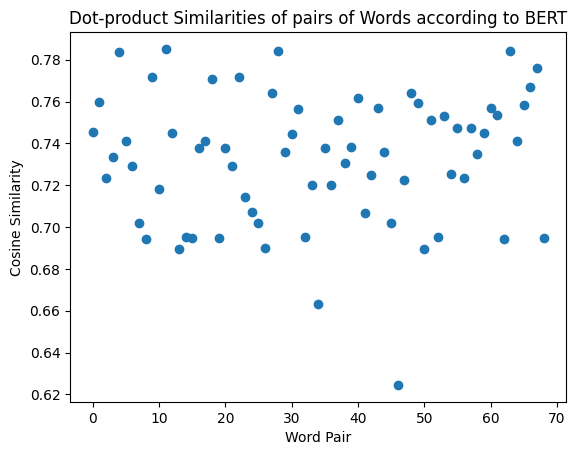

In [ ]:
bertWwords = BertEncodingWords()
similarities = []
for pair in word_pairs:
	similarities.append(1-cosine(bertWwords.getWordVector(pair[0]), bertWwords.getWordVector(pair[1])))
similarities = evaluateAllSentPairs(bertWwords, word_list)
plt.scatter(np.arange(0,len(similarities)),similarities)
plt.title("Dot-product Similarities of pairs of Words according to BERT")
plt.xlabel("Word Pair")
plt.ylabel("Cosine Similarity")

In [ ]:
import csv
import transformers
import numpy as np
from scipy.spatial.distance import cosine
import torch
from transformers import BertTokenizer, BertModel

# OPTIONAL: if you want to have more information on what's happening, activate the logger as follows
import logging
#logging.basicConfig(level=logging.INFO)

import matplotlib.pyplot as plt
#% matplotlib inline

# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
class BertEncoding():
	#https://colab.research.google.com/drive/1yFphU6PW9Uo6lmDly_ud9a6c4RCYlwdX#scrollTo=Zn0n2S-FWZih
	"""
	Reads a CSV of format:
		word1 word2, word3 word4, label
	Where word1&2 make sentence 1 and 3&4 make sentence2.
	"""
	def __init__(self, csv_dir):
		self.data = self.listOfRowsFromSCV(csv_dir)
		self.model = BertModel.from_pretrained('bert-base-uncased',output_hidden_states = True).eval()# output_hidden_states is whether the model returns all hidden-states. # Put the model in "evaluation" mode, meaning feed-forward operation.
		pass

	def listOfRowsFromSCV(self, csv_dir):
		rows = []
		with open(csv_dir, "r") as csvfile:
			reader_variable = csv.reader(csvfile, delimiter=",")
			for row in reader_variable:
				rows.append(row)
		return rows

	def getSentEmbedding(self, sent):
		marked_text = "[CLS] " + sent + " [SEP]"
		tokenized_text = tokenizer.tokenize(marked_text)	# Tokenize our sentence with the BERT tokenizer.
		return(tokenized_text)	# Print out the tokens.

	def preprocessSentence(self, sent, printing=None):
		# Add the special tokens.
		marked_text = "[CLS] " + sent + " [SEP]"
		# Split the sentence into tokens.
		tokenized_text = tokenizer.tokenize(marked_text)
		# Map the token strings to their vocabulary indeces.
		indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
		if printing:
			# Display the words with their indeces.
			for tup in zip(tokenized_text, indexed_tokens):
				print('{:<12} {:>6,}'.format(tup[0], tup[1]))

		# Mark each of the 22 tokens as belonging to sentence "1".
		segments_ids = [1] * len(tokenized_text)
		if printing:
			print(segments_ids)

		# Convert inputs to PyTorch tensors
		tokens_tensor = torch.tensor([indexed_tokens])
		segments_tensors = torch.tensor([segments_ids])
		return tokens_tensor, segments_tensors

	def hiddenLayersBERT(self, sentences):
		# Run the text through BERT, and collect all of the hidden states produced from all 12 layers.
		hidden_states = []
		for idx, sentence in enumerate(sentences):
			with torch.no_grad():
				outputs = self.model(sentence[0], sentence[1])

				# Evaluating the model will return a different number of objects based on
				# how it's  configured in the `from_pretrained` call earlier. In this case,
				# becase we set `output_hidden_states = True`, the third item will be the
				# hidden states from all layers. See the documentation for more details:
				# https://huggingface.co/transformers/model_doc/bert.html#bertmodel
				hidden_states.append(outputs[2])
		return hidden_states

	def GetTokenVecSum(self, hidden_state):
		# Concatenate the tensors for all layers. We use `stack` here to create a new dimension in the tensor.
		# Remove dimension 1, the "batches".
		# Swap dimensions 0 and 1.
		token_embeddings = torch.squeeze(torch.stack(hidden_state, dim=0), dim=1).permute(1,0,2)

		# `hidden_state` has shape [13 x 1 x 22 x 768]
		# `token_vecs` is a tensor with shape [22 x 768]
		token_vecs = hidden_state[-2][0]

		# Calculate the average of all 22 token vectors.
		sentence_embedding = torch.mean(token_vecs, dim=0)

		#stores the token vectors, with shape [22 x 768]
		token_vecs_sum = []

		# `token_embeddings` is a [22 x 12 x 768] tensor.
		for token in token_embeddings:
			# `token` is a [12 x 768] tensor
			# Sum the vectors from the last four layers.
			sum_vec = torch.sum(token[-4:], dim=0)
			# Use `sum_vec` to represent `token`.
			token_vecs_sum.append(sum_vec)

		#print ('Shape is: %d x %d' % (len(token_vecs_sum), len(token_vecs_sum[0])))
		return token_vecs_sum, sentence_embedding

	def BERTSentances(self, row_number):
		sents_to_evaluate = [self.preprocessSentence(self.data[row_number][0]), self.preprocessSentence(self.data[row_number][1])]

		hidden = self.hiddenLayersBERT(sents_to_evaluate)
		return hidden

	def GetEmbeddingsForBothSentences(self, sentences):
		token_embedding_list = []
		sentence_embedding_list = []
		for idx, sentence in enumerate(sentences):
			token_embedding_list.append(self.GetTokenVecSum(sentence)[0])
			sentence_embedding_list.append(self.GetTokenVecSum(sentence)[1])
		return token_embedding_list, sentence_embedding_list

	def CosineSimilarity(self, sent0, sent1):
		return 1-cosine(sent0, sent1)

	def evaluateSentPair(self, row_number):
		sents_to_evaluate = [self.preprocessSentence(self.data[row_number][0]), self.preprocessSentence(self.data[row_number][1])]

		hidden = self.hiddenLayersBERT(sents_to_evaluate)
		embeddings = self.GetEmbeddingsForBothSentences(hidden)

		return self.CosineSimilarity(embeddings[1][0], embeddings[1][1])

	def evaluateAllSentPairs(self):
		res = []
		for i in range(len(self.data)):
			res.append(self.evaluateSentPair(i))
		return res

In [ ]:
!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 20.4 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
  Attempting uninstall: autograd
    Found existing installation: autograd 1.6.2
    Uninstalling autograd-1.6.2:
      Successfully uninstalled autograd-1.6.2


In [ ]:
import lambeq as lq
import pennylane as pl
import numpy as np

In [ ]:
#######################CREATING_PAPER_Вплив кодування даних на виражальну силу варіаційних моделей квантового машинного навчання.ipynb


In [ ]:
import matplotlib.pyplot as plt
import pennylane as qml
from pennylane import numpy as np

np.random.seed(42)

In [ ]:
def square_loss(targets, predictions):
	loss = 0
	for t, p in zip(targets, predictions):
		loss += (t - p) ** 2
	loss = loss / len(targets)
	return 0.5*loss

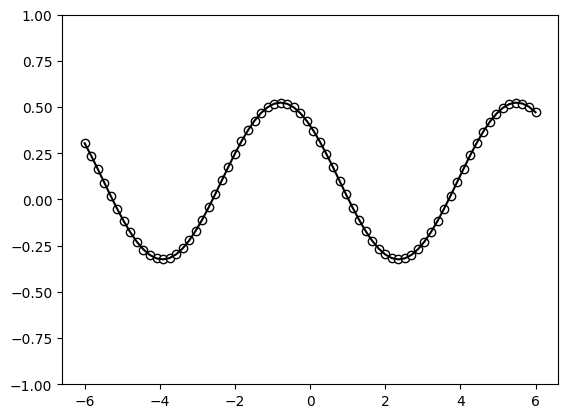

In [ ]:
degree = 1  # degree of the target function
scaling = 1  # scaling of the data
coeffs = [0.15 + 0.15j]*degree  # coefficients of non-zero frequencies
coeff0 = 0.1  # coefficient of zero frequency

def target_function(x):
    """Generate a truncated Fourier series, where the data gets re-scaled."""
    res = coeff0
    for idx, coeff in enumerate(coeffs):
        exponent = np.complex128(scaling * (idx+1) * x * 1j)
        conj_coeff = np.conjugate(coeff)
        res += coeff * np.exp(exponent) + conj_coeff * np.exp(-exponent)
    return np.real(res)

x = np.linspace(-6, 6, 70, requires_grad=False)
target_y = np.array([target_function(x_) for x_ in x], requires_grad=False)

plt.plot(x, target_y, c='black')
plt.scatter(x, target_y, facecolor='white', edgecolor='black')
plt.ylim(-1, 1)
plt.show();

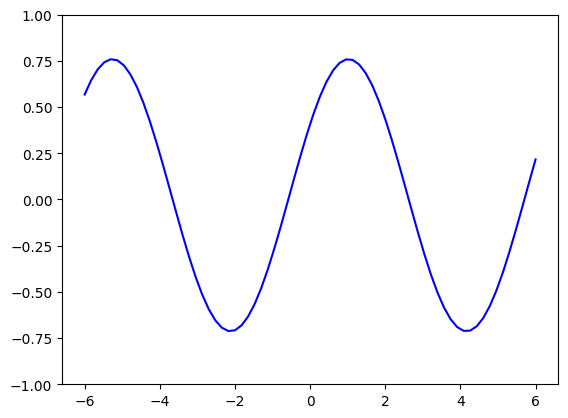

In [ ]:
r = 1 # number of times the encoding gets repeated (here equal to the number of layers)
weights = 2 * np.pi * np.random.random(size=(r+1, 3), requires_grad=True) # some random initial weights

x = np.linspace(-6, 6, 70, requires_grad=False)
random_quantum_model_y = [serial_quantum_model(weights, x_) for x_ in x]

plt.plot(x, random_quantum_model_y, c='blue')
plt.ylim(-1,1)
plt.show()

Cost at step  10: 0.03212041720004567
Cost at step  20: 0.01385356188302468
Cost at step  30: 0.004049396436389442
Cost at step  40: 0.0005624933894468399
Cost at step  50: 8.145777333271303e-05


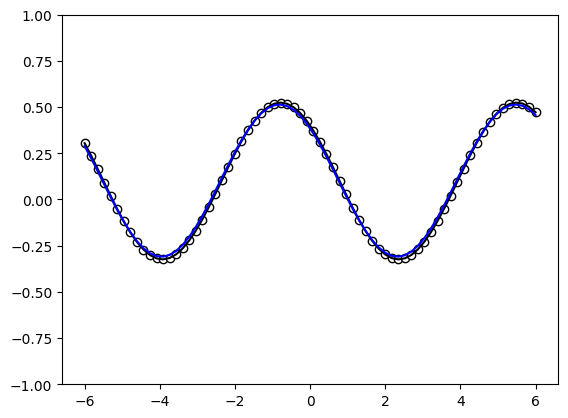

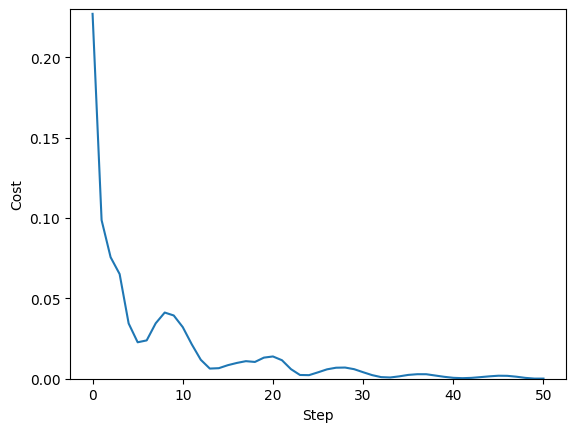

In [ ]:
def cost(weights, x, y):
    predictions = [serial_quantum_model(weights, x_) for x_ in x]
    return square_loss(y, predictions)

max_steps = 50
opt = qml.AdamOptimizer(0.3) #PennyLane's own AdamOptimizer
batch_size = 25
cst = [cost(weights, x, target_y)]  # initial cost

for step in range(max_steps):

    # Select batch of data
    batch_index = np.random.randint(0, len(x), (batch_size,))
    x_batch = x[batch_index]
    y_batch = target_y[batch_index]

    # Update the weights by one optimizer step
    weights, _, _ = opt.step(cost, weights, x_batch, y_batch)

    # Save, and possibly print, the current cost
    c = cost(weights, x, target_y)
    cst.append(c)
    if (step + 1) % 10 == 0:
        print("Cost at step {0:3}: {1}".format(step + 1, c))

predictions = [serial_quantum_model(weights, x_) for x_ in x]

plt.plot(x, target_y, c='black')
plt.scatter(x, target_y, facecolor='white', edgecolor='black')
plt.plot(x, predictions, c='blue')
plt.ylim(-1,1)
plt.show();

plt.plot(range(len(cst)), cst)
plt.ylabel("Cost")
plt.xlabel("Step")
plt.ylim(0, 0.23)
plt.show();

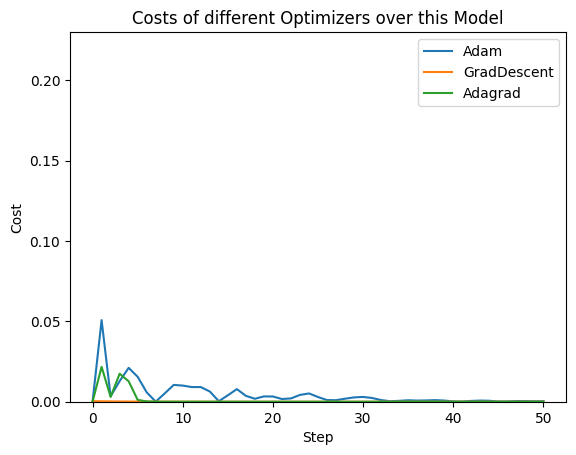

In [ ]:
max_steps = 50
batch_size = 25
optimizer_names = ["Adam", "GradDescent", "Adagrad"]
for idx, opt in enumerate([qml.AdamOptimizer(0.3), qml.GradientDescentOptimizer(0.3), qml.AdagradOptimizer(0.3)]):
	cst=[cost(weights, x, target_y)] #initial cost
	for step in range(max_steps):
		batch_index = np.random.randint(0, len(x), (batch_size,)) # Select batch of data
		x_batch = x[batch_index]
		y_batch = target_y[batch_index]

		# Update the weights by one optimizer step
		weights, _, _ = opt.step(cost, weights, x_batch, y_batch)

		c = cost(weights, x, target_y)
		cst.append(c)

	predictions = [serial_quantum_model(weights, x_) for x_ in x]
	plt.plot(range(len(cst)), cst, label=optimizer_names[idx])
	plt.ylabel("Cost")
	plt.xlabel("Step")
	plt.ylim(0, 0.23)
plt.title("Costs of different Optimizers over this Model")
plt.legend()
plt.show()


In [ ]:
from pennylane.templates import StronglyEntanglingLayers

In [ ]:
n_ansatz_layers = 2
n_qubits = 3

dev = qml.device('default.qubit', wires=4)

@qml.qnode(dev)
def ansatz(weights):
    StronglyEntanglingLayers(weights, wires=range(n_qubits))
    return qml.expval(qml.Identity(wires=0))

weights_ansatz = 2 * np.pi * np.random.random(size=(n_ansatz_layers, n_qubits, 3))
print(qml.draw(ansatz, expansion_strategy="device")(weights_ansatz))

0: ──Rot(4.03,1.73,3.11)─╭●────╭X──Rot(1.86,1.61,2.06)─╭●─╭X────┤  <I>
1: ──Rot(0.76,3.70,1.99)─╰X─╭●─│───Rot(1.03,1.14,4.97)─│──╰●─╭X─┤     
2: ──Rot(3.94,5.08,3.84)────╰X─╰●──Rot(2.42,2.74,3.73)─╰X────╰●─┤     


In [ ]:
scaling = 1
r = 3

dev = qml.device('default.qubit', wires=r)

def S(x):
    """Data-encoding circuit block."""
    for w in range(r):
        qml.RX(scaling * x, wires=w)

def W(theta):
    """Trainable circuit block."""
    StronglyEntanglingLayers(theta, wires=range(r))


@qml.qnode(dev)
def parallel_quantum_model(weights, x):

    W(weights[0])
    S(x)
    W(weights[1])

    return qml.expval(qml.PauliZ(wires=0))

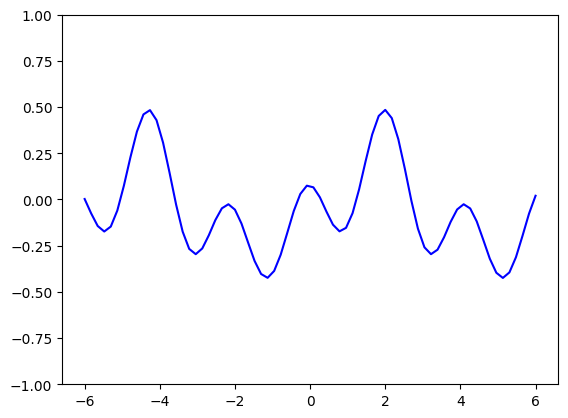

In [ ]:
trainable_block_layers = 3
weights = 2 * np.pi * np.random.random(size=(2, trainable_block_layers, r, 3), requires_grad=True)

x = np.linspace(-6, 6, 70, requires_grad=False)
random_quantum_model_y = [parallel_quantum_model(weights, x_) for x_ in x]

plt.plot(x, random_quantum_model_y, c='blue')
plt.ylim(-1,1)
plt.show();

Cost at step  10: 0.004195017832793636
Cost at step  20: 0.00778766878212718
Cost at step  30: 0.0067917778313035665
Cost at step  40: 0.000931450398663267
Cost at step  50: 0.0009429940281990012


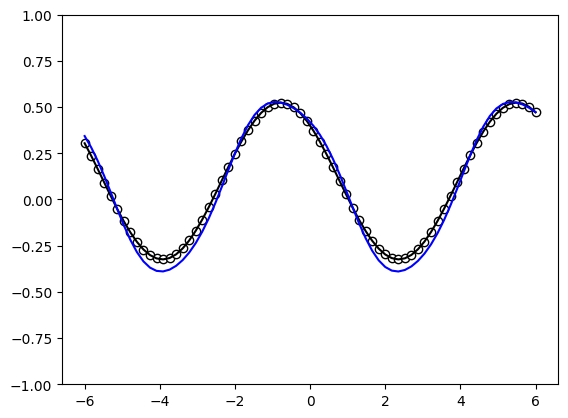

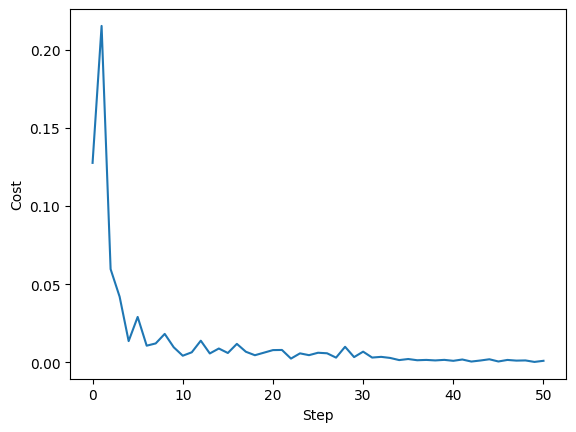

In [ ]:
def cost(weights, x, y):
    predictions = [parallel_quantum_model(weights, x_) for x_ in x]
    return square_loss(y, predictions)

max_steps = 50
opt = qml.AdamOptimizer(0.3)
batch_size = 25
cst = [cost(weights, x, target_y)]  # initial cost

for step in range(max_steps):

    # select batch of data
    batch_index = np.random.randint(0, len(x), (batch_size,))
    x_batch = x[batch_index]
    y_batch = target_y[batch_index]

    # update the weights by one optimizer step
    weights, _, _ = opt.step(cost, weights, x_batch, y_batch)

    # save, and possibly print, the current cost
    c = cost(weights, x, target_y)
    cst.append(c)
    if (step + 1) % 10 == 0:
        print("Cost at step {0:3}: {1}".format(step + 1, c))

predictions = [parallel_quantum_model(weights, x_) for x_ in x]

plt.plot(x, target_y, c='black')
plt.scatter(x, target_y, facecolor='white', edgecolor='black')
plt.plot(x, predictions, c='blue')
plt.ylim(-1,1)
plt.show();

plt.plot(range(len(cst)), cst)
plt.ylabel("Cost")
plt.xlabel("Step")
plt.show();

In [ ]:
def fourier_coefficients(f, K):
    """
    Computes the first 2*K+1 Fourier coefficients of a 2*pi periodic function.
    """
    n_coeffs = 2 * K + 1
    t = np.linspace(0, 2 * np.pi, n_coeffs, endpoint=False)
    y = np.fft.rfft(f(t)) / t.size
    return y

In [ ]:
from pennylane.templates import BasicEntanglerLayers

scaling = 1
n_qubits = 4

dev = qml.device('default.qubit', wires=n_qubits)

def S(x):
    """Data encoding circuit block."""
    for w in range(n_qubits):
        qml.RX(scaling * x, wires=w)

def W(theta):
    """Trainable circuit block."""
    BasicEntanglerLayers(theta, wires=range(n_qubits))


@qml.qnode(dev)
def quantum_model(weights, x):

    W(weights[0])
    S(x)
    W(weights[1])

    return qml.expval(qml.PauliZ(wires=0))

n_ansatz_layers = 1

def random_weights():
    return 2 * np.pi * np.random.random(size=(2, n_ansatz_layers, n_qubits))

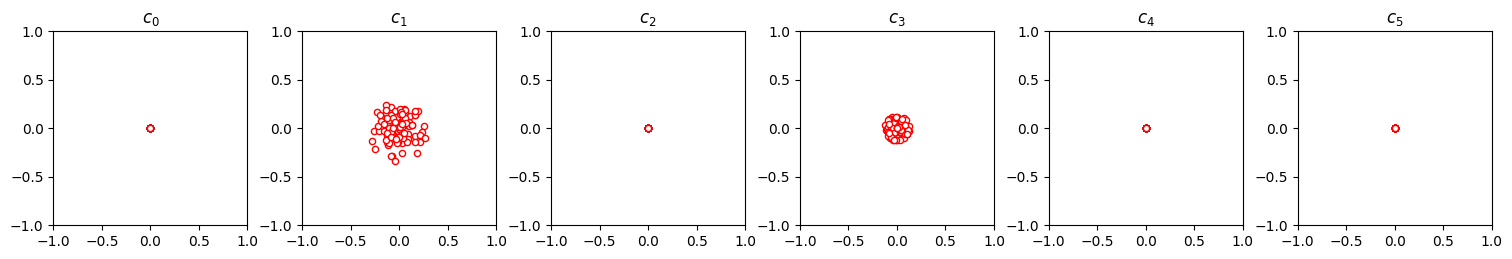

In [ ]:
n_coeffs = 5
n_samples = 100


coeffs = []
for i in range(n_samples):

    weights = random_weights()

    def f(x):
        return np.array([quantum_model(weights, x_) for x_ in x])

    coeffs_sample = fourier_coefficients(f, n_coeffs)
    coeffs.append(coeffs_sample)

coeffs = np.array(coeffs)
coeffs_real = np.real(coeffs)
coeffs_imag = np.imag(coeffs)

n_coeffs = len(coeffs_real[0])

fig, ax = plt.subplots(1, n_coeffs, figsize=(15, 4))

for idx, ax_ in enumerate(ax):
    ax_.set_title(r"$c_{}$".format(idx))
    ax_.scatter(coeffs_real[:, idx], coeffs_imag[:, idx], s=20,
                facecolor='white', edgecolor='red')
    ax_.set_aspect("equal")
    ax_.set_ylim(-1, 1)
    ax_.set_xlim(-1, 1)


plt.tight_layout(pad=0.5)
plt.show();

In [ ]:
var = 2
n_ansatz_layers = 1
dev_cv = qml.device('default.gaussian', wires=1)

def S(x):
    qml.Rotation(x, wires=0)

def W(theta):
    """Trainable circuit block."""
    for r_ in range(n_ansatz_layers):
        qml.Displacement(theta[0], theta[1], wires=0)
        qml.Squeezing(theta[2], theta[3], wires=0)

@qml.qnode(dev_cv)
def quantum_model(weights, x):
    W(weights[0])
    S(x)
    W(weights[1])
    return qml.expval(qml.X(wires=0))

def random_weights():
    return np.random.normal(size=(2, 5 * n_ansatz_layers), loc=0, scale=var)

In [ ]:
#####IanMeeting.ipynb

In [ ]:
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 22.9 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125926 sha256=4ab5268cceb0d56d70964fcb718b98b55a2517fd48d128e94f32f9e50f02d2de
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [ ]:
# read the text file into a pandas dataframe
#df = pd.read_csv('Sadrzadeh-Kartsaklis-TransativeWordData.txt', sep=' ')
df = pd.read_csv('LargerSadrKartTransative.txt', sep=' ')

# assign column names to the dataframe
df.columns = ['annotator', 'subject1', 'verb1', 'object1', 'subject2', 'verb2', 'object2', 'score']

# group the data by the three sentence columns and calculate the mean and standard deviation of the score column
grouped_data = df.groupby(['subject1', 'verb1', 'object1', 'subject2', 'verb2', 'object2']).agg({'score': [np.mean, np.std]}).reset_index()

# flatten the multi-level column names of the grouped data
grouped_data.columns = [' '.join(col).strip() for col in grouped_data.columns.values]

# rename the mean and std columns to 'score' and 'range' respectively
grouped_data.rename(columns={'score mean': 'score', 'score std': 'range'}, inplace=True)
grouped_data['score'] = grouped_data['score']/grouped_data['score'].max()

unique_word_list = []
for ind, row in grouped_data.iterrows():
	for i in [row['subject1'],row['verb1'],row['object1'], row['subject2'],row['verb2'],row['object2']]:
		unique_word_list.append(i)
unique_word_list = list(set(unique_word_list)) #Makes word_list from word_list's unique elements

grouped_data.to_csv("AveragedLargerSadrKartTransative.txt")

# Create an instance of MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

# Rescale the 'score' column
grouped_data['score'] = scaler.fit_transform(grouped_data[['score']])

#Unique datapoints:
#len(grouped_data['subject1'].unique()), len(grouped_data['verb1'].unique()), len(grouped_data['object1'].unique()), len(grouped_data['subject2'].unique()), len(grouped_data['verb2'].unique()), len(grouped_data['object2'].unique())
grouped_data.describe()

,score,range
count,108.000000,108.000000
mean,-0.497859,0.923883
std,0.550354,0.538162
min,-1.000000,0.000000
25%,-0.938911,0.495386
50%,-0.744186,0.972611
75%,-0.160207,1.348797
max,1.000000,1.929594


In [ ]:
embedder = SentenceTransformer('paraphrase-MiniLM-L6-v2')
"""
	Assumes names use 1&2 eg: subject1, subject2, verb1, verb2...
    For each sentence pair, calculate the 2 embedding representations and calculate the cosine.
    I then print the correlation to this cosine difference and the human annotation
"""
grouped_data['SENT_sent_sim'] = grouped_data.apply(lambda row: 1 - cosine(embedder.encode(row['subject1'] + " " + row['verb1'] + " " + row['object1']),
                                                                       embedder.encode(row['subject2'] + " " + row['verb2'] + " " + row['object2'])), axis=1)

"""
    For each word, use the sentence embedder to find the word embedding.
    Find the cosine difference of each word pair (compare subjects, compare verbs)
    I average these cosine differences
    Find correlations to human annotations
"""
word_columns = ['subject', 'verb', 'object']
similarity_columns = ['SENT_sub_sim', 'SENT_verb_sim', 'SENT_obj_sim']
for i, col in enumerate(word_columns):
    grouped_data[similarity_columns[i]] = grouped_data.apply(lambda row: 1 - cosine(embedder.encode(row[col + '1']),
                                                                                   embedder.encode(row[col + '2'])), axis=1)

grouped_data['ave'] = grouped_data[similarity_columns].mean(axis=1)
grouped_data.corr(numeric_only=True, method='spearman')

,score,range,SENT_sent_sim,SENT_sub_sim,SENT_verb_sim,SENT_obj_sim,ave
score,1.000000,0.858698,0.797066,0.630270,0.458983,0.558049,0.746846
range,0.858698,1.000000,0.598361,0.403131,0.446381,0.495584,0.580353
SENT_sent_sim,0.797066,0.598361,1.000000,0.786958,0.420281,0.632657,0.864033
SENT_sub_sim,0.630270,0.403131,0.786958,1.000000,0.245219,0.418000,0.784862
SENT_verb_sim,0.458983,0.446381,0.420281,0.245219,1.000000,0.218815,0.623512
SENT_obj_sim,0.558049,0.495584,0.632657,0.418000,0.218815,1.000000,0.713626
ave,0.746846,0.580353,0.864033,0.784862,0.623512,0.713626,1.000000


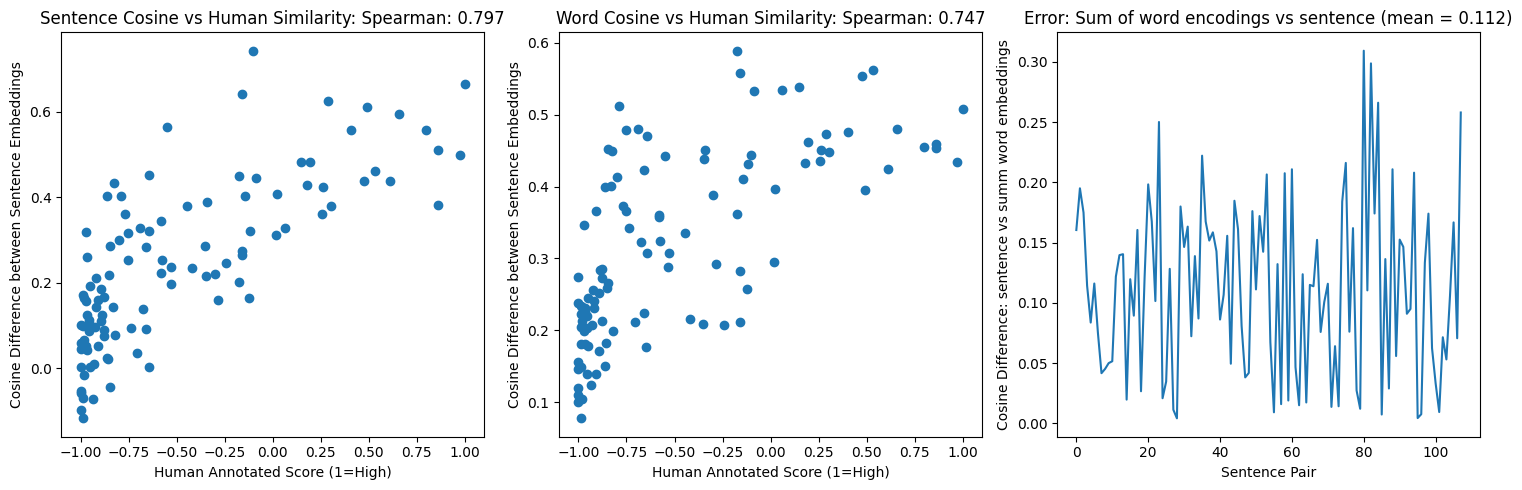

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].scatter(grouped_data['score'], grouped_data['SENT_sent_sim'])
axs[0].set_title("Sentence Cosine vs Human Similarity: Spearman: " +
                str(round(grouped_data['score'].corr(grouped_data['SENT_sent_sim'], method='spearman'), 3)))
axs[0].set_xlabel("Human Annotated Score (1=High)")
axs[0].set_ylabel("Cosine Difference between Sentence Embeddings")


axs[1].scatter(grouped_data['score'], grouped_data['ave'])
axs[1].set_title("Word Cosine vs Human Similarity: Spearman: " +
                str(round(grouped_data['score'].corr(grouped_data['ave'], method='spearman'), 3)))
axs[1].set_xlabel("Human Annotated Score (1=High)")
axs[1].set_ylabel("Cosine Difference between Sentence Embeddings")


axs[2].plot(np.sqrt((grouped_data['SENT_sent_sim'] - grouped_data['ave']) ** 2))
axs[2].set_title("Error: Sum of word encodings vs sentence (mean = " +
                str(np.round(np.sqrt((grouped_data['SENT_sent_sim'] - grouped_data['ave']) ** 2).mean(), 3)) + ")")
axs[2].set_xlabel("Sentence Pair")
axs[2].set_ylabel("Cosine Difference: sentence vs summ word embeddings")

plt.tight_layout()

plt.show()

In [ ]:
def DimReduceByPCA(input_array, new_dims):
	#Pick new_dims Eigenvectors
	pca = PCA(n_components = new_dims)
	pca.fit(input_array)
	data_pca = pca.transform(input_array)
	return data_pca

def DimReduceBySVD(input_array, new_dims):
    U, D, Vt = np.linalg.svd(input_array)
    U_reduced = U[:, :new_dims]
    A_reduced = np.dot(U_reduced, np.diag(D))
    return A_reduced

def RotateWordVector(input_word_vector):
	#Define word as a similarity vector compared to all the other words in corpus
	rotated_word_vector = np.zeroes(len(unique_word_list))
	for index, comaprison_word in enumerate(unique_word_list):
		rotated_word_vector[index] = (1-cosine(input_word_vector, embedder.encode(comaprison_word)))
	return rotated_word_vector

In [ ]:
#Making a dict of words as keys do our dimensionality vectors: {word: {dim_method : vector}}
corpus_array = np.zeros(shape=(len(unique_word_list), 384))
word_vector_dict = {}
for i, word in enumerate(unique_word_list):
		vector = embedder.encode(word)
		word_vector_dict.update({word: {len(vector):vector}})
		corpus_array[i] = vector

for j in range(12):
	pca_dim = j
	pca = DimReduceByPCA(corpus_array, pca_dim)
	for i, word in enumerate(unique_word_list):
			word_vector_dict[word].update({"pca_"+str(pca_dim):pca[i]})

,score,range,SENT_sent_sim,SENT_sub_sim,SENT_verb_sim,SENT_obj_sim,ave,PCA_11
score,1.000000,0.858698,0.797066,0.630270,0.458983,0.558049,0.746846,0.560750
range,0.858698,1.000000,0.598361,0.403131,0.446381,0.495584,0.580353,0.425979
SENT_sent_sim,0.797066,0.598361,1.000000,0.786958,0.420281,0.632657,0.864033,0.732926
SENT_sub_sim,0.630270,0.403131,0.786958,1.000000,0.245219,0.418000,0.784862,0.626439
SENT_verb_sim,0.458983,0.446381,0.420281,0.245219,1.000000,0.218815,0.623512,0.463081
SENT_obj_sim,0.558049,0.495584,0.632657,0.418000,0.218815,1.000000,0.713626,0.548963
ave,0.746846,0.580353,0.864033,0.784862,0.623512,0.713626,1.000000,0.765288
PCA_11,0.560750,0.425979,0.732926,0.626439,0.463081,0.548963,0.765288,1.000000


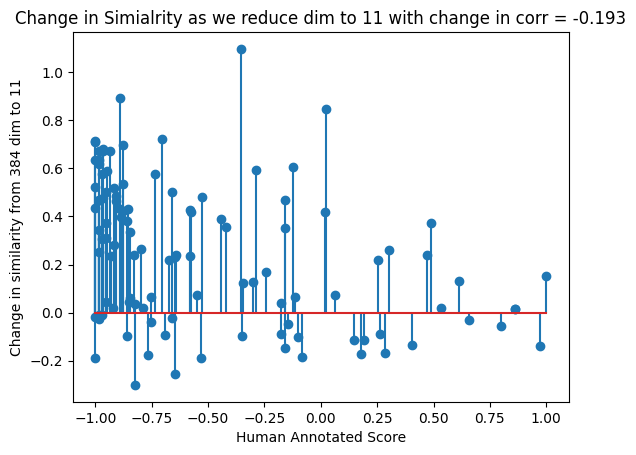

In [ ]:
similarities = []
for ind, row in grouped_data.iterrows():
	rows_embeddings = []
	sent1 = word_vector_dict[row['subject1']][384] + word_vector_dict[row['verb1']][384] + word_vector_dict[row['object1']][384]
	sent2 = word_vector_dict[row['subject2']][384] + word_vector_dict[row['verb2']][384] + word_vector_dict[row['object2']][384]

	sent1_low_dim = word_vector_dict[row['subject1']]["pca_"+str(pca_dim)] + word_vector_dict[row['verb1']]["pca_"+str(pca_dim)] + word_vector_dict[row['object1']]["pca_"+str(pca_dim)]
	sent2__low_dim = word_vector_dict[row['subject2']]["pca_"+str(pca_dim)] + word_vector_dict[row['verb2']]["pca_"+str(pca_dim)] + word_vector_dict[row['object2']]["pca_"+str(pca_dim)]
	similarities.append([1-cosine(sent1, sent2), 1-cosine(sent1_low_dim, sent2__low_dim)])

similarities = np.array(similarities)
plt.stem(grouped_data['score'], similarities[:,0]-similarities[:,1])
plt.title("Change in Simialrity as we reduce dim to "+str(pca_dim) +" with change in corr = "+str(
	np.round(grouped_data['score'].corr(pd.Series(similarities[:,1]), method='spearman') - grouped_data['score'].corr(pd.Series(similarities[:,0]), method='spearman'), 3)
	))
plt.xlabel("Human Annotated Score")
plt.ylabel("Change in similarity from 384 dim to "+str(pca_dim))

grouped_data['PCA_'+str(pca_dim)] = similarities[:,1]
grouped_data.corr(numeric_only = True, method='spearman')

In [ ]:
word_vector_dict['agent']

{384: array([-0.024892  , -0.35199907, -0.3820459 , ..., -0.3539791 ,
        -0.04372899,  0.01099022], dtype=float32),
 'pca_0': array([], dtype=float64),
 'pca_1': array([1.40708584]),
 'pca_2': array([ 1.40708584, -1.14018019]),
 'pca_3': array([ 1.40708584, -1.14018019,  0.92208129]),
 'pca_4': array([ 1.40708584, -1.14018019,  0.92208129,  3.27435432]),
 'pca_5': array([ 1.40708584, -1.14018019,  0.92208129,  3.27435432, -0.56083864]),
 'pca_6': array([ 1.40708584, -1.14018019,  0.92208129,  3.27435432, -0.56083864,
         0.07735421]),
 'pca_7': array([ 1.40708584, -1.14018019,  0.92208129,  3.27435432, -0.56083864,
         0.07735421, -0.86836636]),
 'pca_8': array([ 1.40708584, -1.14018019,  0.92208129,  3.27435432, -0.56083864,
         0.07735421, -0.86836636,  2.41264252]),
 'pca_9': array([ 1.40708584, -1.14018019,  0.92208129,  3.27435432, -0.56083864,
         0.07735421, -0.86836636,  2.41264252, -0.17310567]),
 'pca_10': array([ 1.40708584, -1.14018019,  0.92208129,

In [ ]:
def diagram_to_sentence(word_list):
    n, s = Ty('n'), Ty('s')

    words = [
        Word(word_list[0], n),
        Word(word_list[1], n.r @ s @ n.l),
        Word(word_list[2], n)
    ]

    cups = Cup(n, n.r) @ Id(s) @ Cup(n.l, n)

    assert Id().tensor(*words) == words[0] @ words[1] @ words[2]
    assert Ty().tensor(*[n.r, s, n.l]) == n.r @ s @ n.l

    diagram = Id().tensor(*words) >> cups
    return diagram

In [ ]:
def make_diagrams(data,row1, row2=None, drawing=False):
    if not row2:
        row2=row1
    sentence1 = data['subject'+str(1)][row1] + " " + data['verb'+str(1)][row1]  + " " + data['object'+str(1)][row1]
    sentence2 = data['subject'+str(2)][row2] + " " + data['verb'+str(2)][row2]  + " " + data['object'+str(2)][row2]

    diagram1 = diagram_to_sentence(sentence1.split(" "))
    diagram1 = remove_cups(diagram1)
    diagram2 = diagram_to_sentence(sentence2.split(" "))
    diagram2 = remove_cups(diagram2)

    if drawing:
        diagram1.draw(figsize=(14,3), fontsize=12)
    return diagram1, diagram2

In [ ]:
def make_circuit_from_diagrams(diagram1, diagram2, drawing=False, qubits_noun=2, qubits_subject=2, upload_count=1):
    N = AtomicType.NOUN
    S = AtomicType.SENTENCE

    # Convert string diagram to quantum circuit
    ansatz = IQPAnsatz({N: qubits_noun, S: qubits_subject}, n_layers=upload_count)

    discopy_circuit1 = ansatz(diagram1)
    discopy_circuit2 = ansatz(diagram2)
    discopy_circuit2 = discopy_circuit2.dagger()

    discopy_circuit = discopy_circuit1 >> discopy_circuit2

    #Remove if neccessary...Encode vector into rotation gates
    #num_params = len(vector)
    #for i in range(num_params):
    #    qml.CNOT(wires=[i, i+1])
    #    qml.RX(vector[i][0], wires=i)

    if drawing:
        discopy_circuit.draw(figsize=(15, 10))

    pennylane_circuit = discopy_circuit.to_pennylane()

    return pennylane_circuit, discopy_circuit

In [ ]:
def make_circuit_from_data(data, row_number, NOUN_QUBIT_COUNT, VERB_QUBIT_COUNT):
    diagram1, diagram2 = make_diagrams(data, row_number)
    qml_circuit, discopy_circuit = make_circuit_from_diagrams(diagram1, diagram2, False, NOUN_QUBIT_COUNT, VERB_QUBIT_COUNT)
    return qml_circuit, discopy_circuit

In [ ]:
def free_symbols_to_rotations(symbols):
    noun_parameters = 3 if NOUN_QUBIT_COUNT == 1 else (NOUN_QUBIT_COUNT-1)
    subject_parameters = NOUN_QUBIT_COUNT + NOUN_QUBIT_COUNT + VERB_QUBIT_COUNT - 1

    weights = np.zeros(shape=(len(symbols)))
    for i, word_symbol in enumerate(symbols):
        word = word_symbol.name.split("_")
        word_string = word[0]
        word_type = word[-2]
        if word_type == "n":
            word_dims = noun_parameters
        elif "@" in word_type:
            word_dims = subject_parameters #Dynamically calc these later
        word_index = int(word[-1])
        weights[i] = word_vector_dict[word_string]['pca_'+str(word_dims)][word_index]/(2*np.pi)
    return weights

In [ ]:
def normal_distribution_to_rotations(symbols):
    noun_parameters = 3 if NOUN_QUBIT_COUNT == 1 else (NOUN_QUBIT_COUNT-1)
    subject_parameters = NOUN_QUBIT_COUNT + NOUN_QUBIT_COUNT + VERB_QUBIT_COUNT - 1

    weights = np.zeros(shape=(len(symbols)))
    for i, word_symbol in enumerate(symbols):
        word = word_symbol.name.split("_")
        word_string = word[0]
        word_index = int(word[-1])
        word_type = word[-2]
        if word_type == "n":
            word_dims = noun_parameters
        elif "@" in word_type:
            word_dims = subject_parameters #Dynamically calc these later

        mean_of_word = word_vector_dict[word_string][MOST_ACCURATE_MODEL].mean()
        std_of_word = word_vector_dict[word_string][MOST_ACCURATE_MODEL].std()
        np.random.seed(SEED) #Ran once so that we do not repeat numbers
        s = np.random.normal(mean_of_word, std_of_word, 1)

        weights[i] = s
    return weights

In [ ]:
def plot_model_over_training(model):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    fig.figsize=(30,15)

    ax1.scatter(model.val_costs,model.train_epoch_costs,c=epoch_count, cmap='gray')
    ax1.set_xlabel("Validation Loss")
    ax1.set_ylabel("Training Loss")
    ax1.set_title("Loss of Validation and Training, should be a nice curve")
    #fig.colorbar(im = ax1.scatter, ax=ax1)

    ax2.set_title("Train & Val Losses")
    ax2.plot(epoch_count, model.val_costs, label = 'Validate')
    ax2.plot(epoch_count, model.train_epoch_costs, label = 'Train')
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Loss")
    ax2.legend()
    fig.show()

In [ ]:
!pip install --upgrade "jax[cpu]"
import jax.numpy as jnp

In [ ]:
import jax.numpy as jnp

In [ ]:
class R2Loss(LossFunction):
    def calculate_loss(self,
                       y_pred: np.ndarray | jnp.ndarray,
                       y_true: np.ndarray | jnp.ndarray) -> float:

        self._match_shapes(y_pred, y_true)
        n_features = 2 * (3 if NOUN_QUBIT_COUNT == 1 else (NOUN_QUBIT_COUNT-1)) + (NOUN_QUBIT_COUNT + NOUN_QUBIT_COUNT + VERB_QUBIT_COUNT - 1)

        n = len(y_true)
        numerator = np.sum((y_true - y_pred) ** 2)
        denominator = np.sum((y_true - np.mean(y_true)) ** 2) + 1e-10
        r2 = 1 - (numerator / denominator)

        adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - n_features - 1))
        return adjusted_r2

In [ ]:
def calculate_train_val_overlap(train_data, val_data):
    # Overlap of training and Test data
    training_words = []
    for circuit in train_data:
        for parameter in circuit.free_symbols:
            training_words.append(parameter.name.split("_")[0])
    training_words = np.array(training_words)

    validate_words = []
    for circuit in val_data:
        for parameter in circuit.free_symbols:
            validate_words.append(parameter.name.split("_")[0])
    validate_words = np.array(validate_words)

    validate_words= set(np.unique(validate_words))
    training_words = set(np.unique(training_words))
    print("%/ of validation words in training words",  len(validate_words.intersection(training_words))/len(validate_words))

In [ ]:
BATCH_SIZE = 2
EPOCHS = 2000
SEED = 42

OPTIMIZER_PARAM = {'a': 0.75, 'c': 0.1, 'A':0.01*EPOCHS}
NOUN_QUBIT_COUNT = 1
VERB_QUBIT_COUNT = 3
EVAL_FUNCTIONS = {'r2': R2Loss()}
MOST_ACCURATE_MODEL = 384

identifier = '' #Write description of model here
string_identifier = identifier + str(NOUN_QUBIT_COUNT)+'_'+str(VERB_QUBIT_COUNT) +'_'+str(EPOCHS)+'_'+str(BATCH_SIZE)+'_'+ str(SEED)+"_"+'_'.join(str(obj) for obj in [str(i) for i in OPTIMIZER_PARAM.values()])

epoch_count = np.array([i for i in range(0, EPOCHS)])

torch.manual_seed(SEED)
random.seed(SEED)
np.random.seed(SEED)

In [ ]:
#############SentenceEncoding

In [ ]:
pip install -U sentence-transformers

In [ ]:
pip install transformers

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine
from sklearn.decomposition import PCA

In [ ]:
# read the text file into a pandas dataframe
#df = pd.read_csv('Sadrzadeh-Kartsaklis-TransativeWordData.txt', sep=' ')
df = pd.read_csv('LargerSadrKartTransative.txt', sep=' ')

# assign column names to the dataframe
df.columns = ['annotator', 'subject1', 'verb1', 'object1', 'subject2', 'verb2', 'object2', 'score']

# group the data by the three sentence columns and calculate the mean and standard deviation of the score column
grouped_data = df.groupby(['subject1', 'verb1', 'object1', 'subject2', 'verb2', 'object2']).agg({'score': [np.mean, np.std]}).reset_index()

# flatten the multi-level column names of the grouped data
grouped_data.columns = [' '.join(col).strip() for col in grouped_data.columns.values]

# rename the mean and std columns to 'score' and 'range' respectively
grouped_data.rename(columns={'score mean': 'score', 'score std': 'range'}, inplace=True)
grouped_data['score'] = grouped_data['score']/grouped_data['score'].max()

unique_word_list = []
for ind, row in grouped_data.iterrows():
	for i in [row['subject1'],row['verb1'],row['object1'], row['subject2'],row['verb2'],row['object2']]:
		unique_word_list.append(i)
unique_word_list = list(set(unique_word_list)) #Makes word_list from word_list's unique elements

grouped_data.describe()

,score,range
count,108.000000,108.000000
mean,0.372650,0.923883
std,0.230505,0.538162
min,0.162338,0.000000
25%,0.187923,0.495386
50%,0.269481,0.972611
75%,0.514069,1.348797
max,1.000000,1.929594


In [ ]:
low = grouped_data[grouped_data['score'] < 1.157609]

high = grouped_data[grouped_data['score'] > 3.166667]

    subject1  verb1   object1  subject2     verb2  object2     score     range
0      agent   sell  property    family       buy     home  0.507305  1.541104
1      agent   sell  property     group      hold  meeting  0.189394  0.481543
2     author  write      book  delegate       buy     land  0.183512  0.625543
3     author  write      book       man      hear     word  0.266234  1.036018
4     author  write      book    writer      read     word  0.514069  1.090140
..       ...    ...       ...       ...       ...      ...       ...       ...
103    woman  drink     water    doctor       use     test  0.182630  0.448427
104    woman  drink     water    system       use   method  0.175866  0.408248
105   worker   join     party  employee     leave  company  0.227273  0.577350
106   writer   read      word    family   receive   letter  0.339433  1.341963
107   writer   read      word    people  remember     name  0.233766  0.768115

[108 rows x 8 columns]


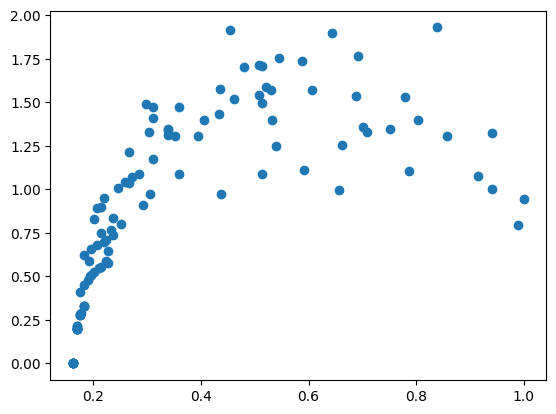

In [ ]:
print(grouped_data)
plt.scatter(grouped_data['score'], grouped_data['range'])

In [ ]:
from Models import *

In [ ]:
######Word2Vec.

In [ ]:
from DataGenerate import *

word_pairs, word_pairs_annotations = GetWordPairs()
print("First 5 Word Pairs: ")
print(word_pairs[:5])

word_list = GetWords()
print("\nFirst 5 Words: ")
word_list[:5]

First 5 Word Pairs: 
[['party', 'government'], ['official', 'leader'], ['state', 'government'], ['control', 'intervention'], ['tax', 'interest']]

First 5 Words: 


['development', 'plan', 'action', 'training', 'education']

In [ ]:
from Models import W2VModel

dimensions = [10,20,30,40,50,60,70,80,90] + list(np.arange(100,800,100))
window = 5

for vector_dims in dimensions: W2VModel(vector_dims, window, printing=True)

W2V = W2VModel(768, 5)
print("First 10 dims of second word in 768 dims: ")
W2V.getvector(word_list[1])[:10]

Made Word2Vec Model of  10  dimensions and  5  window
Made Word2Vec Model of  20  dimensions and  5  window
Made Word2Vec Model of  30  dimensions and  5  window
Made Word2Vec Model of  40  dimensions and  5  window
Made Word2Vec Model of  50  dimensions and  5  window
Made Word2Vec Model of  60  dimensions and  5  window
Made Word2Vec Model of  70  dimensions and  5  window
Made Word2Vec Model of  80  dimensions and  5  window
Made Word2Vec Model of  90  dimensions and  5  window
Made Word2Vec Model of  100  dimensions and  5  window
Made Word2Vec Model of  200  dimensions and  5  window
Made Word2Vec Model of  300  dimensions and  5  window
Made Word2Vec Model of  400  dimensions and  5  window
Made Word2Vec Model of  500  dimensions and  5  window
Made Word2Vec Model of  600  dimensions and  5  window
Made Word2Vec Model of  700  dimensions and  5  window
First 10 dims of second word in 768 dims: 


array([-0.10809772, -0.12771602, -0.03976884,  0.08446065,  0.04937996,
       -0.09387501, -0.12646754, -0.0416215 , -0.14533827,  0.01606836],
      dtype=float32)

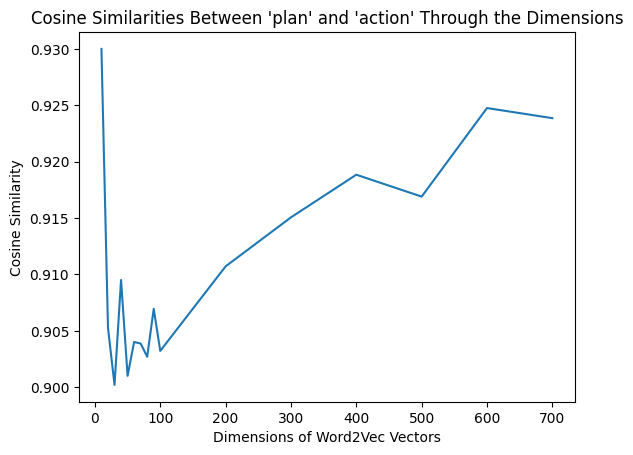

In [ ]:
def PlotWord2VecThroughDims(word1, word2):
	dot_prds = []
	for dims in dimensions:
		model = Word2Vec.load('brown_model_'+str(dims)+"_5")
		dim_dot_prod = []
		dim_dot_prod.append(1-cosine(model.wv[word1],model.wv[word2]))
		dot_prds.append(dim_dot_prod)
	dot_prods = np.array(dot_prds)
	plt.plot(dimensions, dot_prods)
	plt.title("Cosine Similarities Between '"+ word1+ "' and '"+ word2+ "' Through the Dimensions")
	plt.ylabel("Cosine Similarity")
	plt.xlabel("Dimensions of Word2Vec Vectors")
	plt.savefig('Cosine_Similarities_Between_'+ word1+ '_and_'+ word2+ '_Through_the_Dimensions.png')
	plt.show()
	return

PlotWord2VecThroughDims(word_list[1], word_list[2])

In [ ]:
from Models import W2VModel

dimensions = [10,50] + list(np.arange(100,800,100))
windows = [2,5,10,20,50]
window = 5

for vector_dims in dimensions:
	for window in windows:
		W2VModel(vector_dims, window, printing=True)

Made Word2Vec Model of  10  dimensions and  2  window
Load Word2Vec Model of  10  dimensions and  5  window
Made Word2Vec Model of  10  dimensions and  10  window
Made Word2Vec Model of  10  dimensions and  20  window
Made Word2Vec Model of  10  dimensions and  50  window
Made Word2Vec Model of  50  dimensions and  2  window
Load Word2Vec Model of  50  dimensions and  5  window
Made Word2Vec Model of  50  dimensions and  10  window
Made Word2Vec Model of  50  dimensions and  20  window
Made Word2Vec Model of  50  dimensions and  50  window
Made Word2Vec Model of  100  dimensions and  2  window
Load Word2Vec Model of  100  dimensions and  5  window
Made Word2Vec Model of  100  dimensions and  10  window
Made Word2Vec Model of  100  dimensions and  20  window
Made Word2Vec Model of  100  dimensions and  50  window
Made Word2Vec Model of  200  dimensions and  2  window
Load Word2Vec Model of  200  dimensions and  5  window
Made Word2Vec Model of  200  dimensions and  10  window
Made Word2

In [ ]:
pip install lambeq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.8/142.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.9/144.9 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 66.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.3/364.3 kB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 91.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.5/103.5 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 72.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.1 MB/s eta 0:00:00


In [ ]:
pip install discopy

In [ ]:
!pip install pytket-qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 4.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.0/128.0 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 67.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 57.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 82.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [ ]:
import warnings

warnings.filterwarnings("ignore")
import os
import numpy as np
import pandas as pd

os.environ["TOKENIZERS_PARALLELISM"] = "false"
import json
import time
from sklearn.model_selection import train_test_split
from lambeq import (
    remove_cups,
    Rewriter,
    AtomicType,
    IQPAnsatz,
    Dataset,
    TketModel,
    QuantumTrainer,
    SPSAOptimizer,
    BobcatParser,
)
from discopy.tensor import Dim
from copy import copy
from pytket.extensions.qiskit import AerBackend


In [ ]:
def conv_labels_2d(y: list):
    target = []
    for y_i in y:
        if y_i == 0:
            target.append([1, 0])
        else:
            target.append([0, 1])
    return target


df = pd.read_csv("low_complexity2.csv")


# filter neutral instances to achieve binary classification
filter_labels = df["label"].apply(lambda x: x in [0, 2])
labels_idx = filter_labels[filter_labels == True].index
df_bin = df[df.index.isin(labels_idx)]

# train test split
X_train, X_test, y_train, y_test = train_test_split(
    df_bin["text"], df_bin["label"], test_size=0.2, random_state=42
)
# train val split
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42
)

X_train = X_train.to_list()
X_val = X_val.to_list()
X_test = X_test.to_list()
y_train = y_train.to_list()
y_val = y_val.to_list()
y_test = y_test.to_list()

y_train = conv_labels_2d(y_train)
y_val = conv_labels_2d(y_val)
y_test = conv_labels_2d(y_test)

In [ ]:

print(np.shape(y_train), np.shape(y_val), np.shape(y_test))

(5, 2) (1, 2) (2, 2)


In [ ]:
parser = BobcatParser(verbose='text')

raw_train_diagrams = parser.sentences2diagrams(X_train, suppress_exceptions=True)
raw_val_diagrams = parser.sentences2diagrams(X_val, suppress_exceptions=True)
raw_test_diagrams = parser.sentences2diagrams(X_test, suppress_exceptions=True)

Tagging sentences.
Parsing tagged sentences.
Turning parse trees to diagrams.
Tagging sentences.
Parsing tagged sentences.
Turning parse trees to diagrams.
Tagging sentences.
Parsing tagged sentences.
Turning parse trees to diagrams.


In [ ]:
def find_indices(list_to_check, item_to_find):
    indices = []
    for idx, value in enumerate(list_to_check):
        if value == item_to_find:
            indices.append(idx)
    return indices

if None in raw_train_diagrams or None in raw_val_diagrams or None in raw_test_diagrams:
    print("Errors while parsing.")
    train_error_sent_idx = find_indices(raw_train_diagrams, None)
    val_error_sent_idx = find_indices(raw_val_diagrams, None)
    test_error_sent_idx = find_indices(raw_test_diagrams, None)

    # filter errors
    raw_train_diagrams = list(filter(lambda x : x is not None, raw_train_diagrams))
    raw_val_diagrams = list(filter(lambda x : x is not None, raw_val_diagrams))
    raw_test_diagrams = list(filter(lambda x : x is not None, raw_test_diagrams))

    # remove errors from target
    y_train = [target for idx, target in enumerate(y_train) if idx not in train_error_sent_idx]
    y_val = [target for idx, target in enumerate(y_val) if idx not in val_error_sent_idx]
    y_test = [target for idx, target in enumerate(y_test) if idx not in test_error_sent_idx]
else:
    print("No errors while parsing.")

No errors while parsing.


In [ ]:
train_diagrams = [remove_cups(diagram) for diagram in raw_train_diagrams]
val_diagrams = [remove_cups(diagram) for diagram in raw_val_diagrams]
test_diagrams = [remove_cups(diagram) for diagram in raw_test_diagrams]

In [ ]:
rewriter = Rewriter(["prepositional_phrase"])

# experimental
rew_train_diagrams = [rewriter(diag).normal_form() for diag in train_diagrams]
rew_val_diagrams = [rewriter(diag).normal_form() for diag in val_diagrams]
rew_test_diagrams = [rewriter(diag).normal_form() for diag in test_diagrams]

In [ ]:
ansatz = IQPAnsatz(
    {AtomicType.NOUN: 1, AtomicType.SENTENCE: 1, AtomicType.PREPOSITIONAL_PHRASE: 1},
    n_layers=1,
    n_single_qubit_params=3,
)


def create_circuits(diagrams: list, targets: list):
    circuits = []
    filtered_targets = []
    for i, diagram in enumerate(diagrams):
        try:
            circuits.append(ansatz(diagram))
            filtered_targets.append(targets[i])
        except ValueError as e:
            print(e)
            print(i)
    return circuits, filtered_targets


train_circuits, y_train_f = create_circuits(rew_train_diagrams, y_train)
val_circuits, y_val_f = create_circuits(rew_val_diagrams, y_val)
test_circuits, y_test_f = create_circuits(rew_test_diagrams, y_test)

In [ ]:
all_circuits = train_circuits + val_circuits + test_circuits

backend = AerBackend(simulation_method="statevector")
backend_config = {
    "backend": backend,
    "compilation": backend.default_compilation_pass(2),
    "shots": 1000,
}
model = TketModel.from_diagrams(all_circuits, backend_config=backend_config)

In [ ]:
loss = lambda y_hat, y: -np.sum(y * np.log(y_hat)) / len(y)  # binary cross-entropy loss


def acc(y_hat, y):
    return np.sum(np.round(y_hat) == y) / len(y) / 2  # half due to double-counting

metrics = {"acc": acc}

In [ ]:
EPOCHS = 2

params = {
    "a": 0.00001,  # learning rate
    "c": 0.06,  # parameter shift scaling factor
    "A": 0.01 * EPOCHS,  # stability constant
}


trainer = QuantumTrainer(
    model,
    loss_function=loss,
    epochs=EPOCHS,
    optimizer=SPSAOptimizer,
    optim_hyperparams=params,
    evaluate_functions=metrics,
    evaluate_on_train=True,
    verbose="text",
)

In [ ]:
BATCH_SIZE = 32

train_dataset = Dataset(train_circuits, y_train_f, batch_size=BATCH_SIZE)
val_dataset = Dataset(val_circuits, y_val_f, shuffle=False)

In [ ]:
def test_step(model, test_circuits, y_test):
    y_hat = model(test_circuits)

    # metrics
    metrics = {
        "acc": acc(y_hat, y_test),
        # ... more metrics you want to test
    }
    return metrics


metrics = test_step(model, test_circuits, y_test)

In [ ]:
#19.07.2023

In [ ]:
pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 20.9 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125926 sha256=cecaac45a981acb65a6fcb211d08d15e79563afcd9b49a0e5a52a1a339564239
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from discopy.grammar import Word
from discopy.rigid import Cup, Id, Ty
import torch
import random

from sentence_transformers import SentenceTransformer

from lambeq import LossFunction, PennyLaneModel, PytorchTrainer, QuantumTrainer, SPSAOptimizer, NumpyModel, MSELoss, Dataset, AtomicType, IQPAnsatz, BobcatParser
from lambeq.pregroups import remove_cups

In [ ]:
# read the text file into a pandas dataframe
#df = pd.read_csv('Sadrzadeh-Kartsaklis-TransativeWordData.txt', sep=' ')
df = pd.read_csv('LargerSadrKartTransative.txt', sep=' ')

# assign column names to the dataframe
df.columns = ['annotator', 'subject1', 'verb1', 'object1', 'subject2', 'verb2', 'object2', 'score']

# group the data by the three sentence columns and calculate the mean and standard deviation of the score column
grouped_data = df.groupby(['subject1', 'verb1', 'object1', 'subject2', 'verb2', 'object2']).agg({'score': [np.mean, np.std]}).reset_index()

# flatten the multi-level column names of the grouped data
grouped_data.columns = [' '.join(col).strip() for col in grouped_data.columns.values]

# rename the mean and std columns to 'score' and 'range' respectively
grouped_data.rename(columns={'score mean': 'score', 'score std': 'range'}, inplace=True)
grouped_data['score'] = grouped_data['score']/grouped_data['score'].max()

unique_word_list = []
for ind, row in grouped_data.iterrows():
	for i in [row['subject1'],row['verb1'],row['object1'], row['subject2'],row['verb2'],row['object2']]:
		unique_word_list.append(i)
unique_word_list = list(set(unique_word_list)) #Makes word_list from word_list's unique elements

grouped_data.to_csv("AveragedLargerSadrKartTransative.txt")

# Create an instance of MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

# Rescale the 'score' column
grouped_data['score'] = scaler.fit_transform(grouped_data[['score']])

#Unique datapoints:
#len(grouped_data['subject1'].unique()), len(grouped_data['verb1'].unique()), len(grouped_data['object1'].unique()), len(grouped_data['subject2'].unique()), len(grouped_data['verb2'].unique()), len(grouped_data['object2'].unique())
grouped_data.describe()

,score,range
count,108.000000,108.000000
mean,-0.497859,0.923883
std,0.550354,0.538162
min,-1.000000,0.000000
25%,-0.938911,0.495386
50%,-0.744186,0.972611
75%,-0.160207,1.348797
max,1.000000,1.929594


In [ ]:
embedder = SentenceTransformer('paraphrase-MiniLM-L6-v2')
"""
	Assumes names use 1&2 eg: subject1, subject2, verb1, verb2...
    For each sentence pair, calculate the 2 embedding representations and calculate the cosine.
    I then print the correlation to this cosine difference and the human annotation
"""
grouped_data['SENT_sent_sim'] = grouped_data.apply(lambda row: 1 - cosine(embedder.encode(row['subject1'] + " " + row['verb1'] + " " + row['object1']),
                                                                       embedder.encode(row['subject2'] + " " + row['verb2'] + " " + row['object2'])), axis=1)

"""
    For each word, use the sentence embedder to find the word embedding.
    Find the cosine difference of each word pair (compare subjects, compare verbs)
    I average these cosine differences
    Find correlations to human annotations
"""
word_columns = ['subject', 'verb', 'object']
similarity_columns = ['SENT_sub_sim', 'SENT_verb_sim', 'SENT_obj_sim']
for i, col in enumerate(word_columns):
    grouped_data[similarity_columns[i]] = grouped_data.apply(lambda row: 1 - cosine(embedder.encode(row[col + '1']),
                                                                                   embedder.encode(row[col + '2'])), axis=1)

grouped_data['ave'] = grouped_data[similarity_columns].mean(axis=1)
grouped_data.corr(numeric_only=True, method='spearman')

,score,range,SENT_sent_sim,SENT_sub_sim,SENT_verb_sim,SENT_obj_sim,ave
score,1.000000,0.858698,0.797066,0.630270,0.458983,0.558049,0.746846
range,0.858698,1.000000,0.598361,0.403131,0.446381,0.495584,0.580353
SENT_sent_sim,0.797066,0.598361,1.000000,0.786958,0.420281,0.632657,0.864033
SENT_sub_sim,0.630270,0.403131,0.786958,1.000000,0.245219,0.418000,0.784862
SENT_verb_sim,0.458983,0.446381,0.420281,0.245219,1.000000,0.218815,0.623512
SENT_obj_sim,0.558049,0.495584,0.632657,0.418000,0.218815,1.000000,0.713626
ave,0.746846,0.580353,0.864033,0.784862,0.623512,0.713626,1.000000


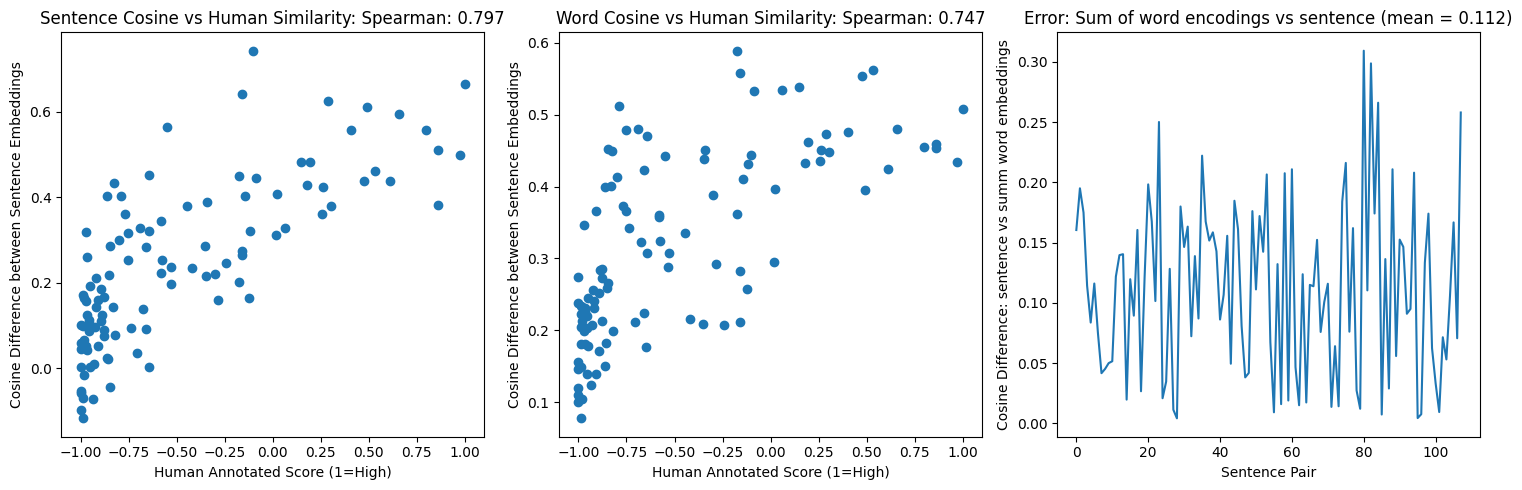

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].scatter(grouped_data['score'], grouped_data['SENT_sent_sim'])
axs[0].set_title("Sentence Cosine vs Human Similarity: Spearman: " +
                str(round(grouped_data['score'].corr(grouped_data['SENT_sent_sim'], method='spearman'), 3)))
axs[0].set_xlabel("Human Annotated Score (1=High)")
axs[0].set_ylabel("Cosine Difference between Sentence Embeddings")


axs[1].scatter(grouped_data['score'], grouped_data['ave'])
axs[1].set_title("Word Cosine vs Human Similarity: Spearman: " +
                str(round(grouped_data['score'].corr(grouped_data['ave'], method='spearman'), 3)))
axs[1].set_xlabel("Human Annotated Score (1=High)")
axs[1].set_ylabel("Cosine Difference between Sentence Embeddings")


axs[2].plot(np.sqrt((grouped_data['SENT_sent_sim'] - grouped_data['ave']) ** 2))
axs[2].set_title("Error: Sum of word encodings vs sentence (mean = " +
                str(np.round(np.sqrt((grouped_data['SENT_sent_sim'] - grouped_data['ave']) ** 2).mean(), 3)) + ")")
axs[2].set_xlabel("Sentence Pair")
axs[2].set_ylabel("Cosine Difference: sentence vs summ word embeddings")

plt.tight_layout()

plt.show()

In [ ]:
def DimReduceByPCA(input_array, new_dims):
	#Pick new_dims Eigenvectors
	pca = PCA(n_components = new_dims)
	pca.fit(input_array)
	data_pca = pca.transform(input_array)
	return data_pca

def DimReduceBySVD(input_array, new_dims):
    U, D, Vt = np.linalg.svd(input_array)
    U_reduced = U[:, :new_dims]
    A_reduced = np.dot(U_reduced, np.diag(D))
    return A_reduced

def RotateWordVector(input_word_vector):
	#Define word as a similarity vector compared to all the other words in corpus
	rotated_word_vector = np.zeroes(len(unique_word_list))
	for index, comaprison_word in enumerate(unique_word_list):
		rotated_word_vector[index] = (1-cosine(input_word_vector, embedder.encode(comaprison_word)))
	return rotated_word_vector

In [ ]:
#Making a dict of words as keys do our dimensionality vectors: {word: {dim_method : vector}}
corpus_array = np.zeros(shape=(len(unique_word_list), 384))
word_vector_dict = {}
for i, word in enumerate(unique_word_list):
		vector = embedder.encode(word)
		word_vector_dict.update({word: {len(vector):vector}})
		corpus_array[i] = vector

for j in range(12):
	pca_dim = j
	pca = DimReduceByPCA(corpus_array, pca_dim)
	for i, word in enumerate(unique_word_list):
			word_vector_dict[word].update({"pca_"+str(pca_dim):pca[i]})

,score,range,SENT_sent_sim,SENT_sub_sim,SENT_verb_sim,SENT_obj_sim,ave,PCA_11
score,1.000000,0.858698,0.797066,0.630270,0.458983,0.558049,0.746846,0.560750
range,0.858698,1.000000,0.598361,0.403131,0.446381,0.495584,0.580353,0.425979
SENT_sent_sim,0.797066,0.598361,1.000000,0.786958,0.420281,0.632657,0.864033,0.732926
SENT_sub_sim,0.630270,0.403131,0.786958,1.000000,0.245219,0.418000,0.784862,0.626439
SENT_verb_sim,0.458983,0.446381,0.420281,0.245219,1.000000,0.218815,0.623512,0.463081
SENT_obj_sim,0.558049,0.495584,0.632657,0.418000,0.218815,1.000000,0.713626,0.548963
ave,0.746846,0.580353,0.864033,0.784862,0.623512,0.713626,1.000000,0.765288
PCA_11,0.560750,0.425979,0.732926,0.626439,0.463081,0.548963,0.765288,1.000000


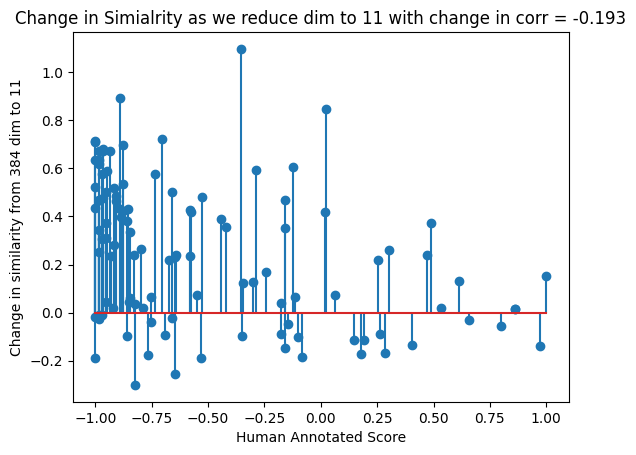

In [ ]:
similarities = []
for ind, row in grouped_data.iterrows():
	rows_embeddings = []
	sent1 = word_vector_dict[row['subject1']][384] + word_vector_dict[row['verb1']][384] + word_vector_dict[row['object1']][384]
	sent2 = word_vector_dict[row['subject2']][384] + word_vector_dict[row['verb2']][384] + word_vector_dict[row['object2']][384]

	sent1_low_dim = word_vector_dict[row['subject1']]["pca_"+str(pca_dim)] + word_vector_dict[row['verb1']]["pca_"+str(pca_dim)] + word_vector_dict[row['object1']]["pca_"+str(pca_dim)]
	sent2__low_dim = word_vector_dict[row['subject2']]["pca_"+str(pca_dim)] + word_vector_dict[row['verb2']]["pca_"+str(pca_dim)] + word_vector_dict[row['object2']]["pca_"+str(pca_dim)]
	similarities.append([1-cosine(sent1, sent2), 1-cosine(sent1_low_dim, sent2__low_dim)])

similarities = np.array(similarities)
plt.stem(grouped_data['score'], similarities[:,0]-similarities[:,1])
plt.title("Change in Simialrity as we reduce dim to "+str(pca_dim) +" with change in corr = "+str(
	np.round(grouped_data['score'].corr(pd.Series(similarities[:,1]), method='spearman') - grouped_data['score'].corr(pd.Series(similarities[:,0]), method='spearman'), 3)
	))
plt.xlabel("Human Annotated Score")
plt.ylabel("Change in similarity from 384 dim to "+str(pca_dim))

grouped_data['PCA_'+str(pca_dim)] = similarities[:,1]
grouped_data.corr(numeric_only = True, method='spearman')

In [ ]:
word_vector_dict['agent']

{384: array([-0.024892  , -0.35199907, -0.3820459 , -0.63825375, -0.08675867,
         0.05312683,  1.215866  , -0.18253447, -0.20966655,  0.13918944,
         0.5322978 ,  0.09031656,  0.15797564,  0.20573531,  0.38095418,
         0.6453262 ,  0.27371374,  0.08803058, -0.4790629 ,  0.11281575,
         0.26898906, -0.04510323,  0.00595768, -0.30830577, -0.23318718,
        -0.3925239 , -0.07737298, -0.0202356 , -0.22112383, -0.4360511 ,
         0.36978903, -0.50094193, -0.6550148 ,  0.18702137,  0.26188624,
         0.21067762, -0.9755955 , -0.11223873,  0.57111603,  0.01407279,
         0.5082024 , -0.08266035,  0.01432612,  0.05869436, -0.52367985,
        -0.72093177, -0.06835098, -0.13416931, -0.17163272, -0.34426013,
        -0.49943838, -0.32222572, -0.24706651,  0.06786991, -0.08893015,
        -0.3548589 ,  0.21553509,  0.69980305, -0.12534128, -0.2088347 ,
         0.11142949,  0.4022334 , -0.42174852,  0.5569677 , -0.94964784,
        -0.004314  , -0.64323616, -0.7905796 ,

In [ ]:
def diagram_to_sentence(word_list):
    n, s = Ty('n'), Ty('s')

    words = [
        Word(word_list[0], n),
        Word(word_list[1], n.r @ s @ n.l),
        Word(word_list[2], n)
    ]

    cups = Cup(n, n.r) @ Id(s) @ Cup(n.l, n)

    assert Id().tensor(*words) == words[0] @ words[1] @ words[2]
    assert Ty().tensor(*[n.r, s, n.l]) == n.r @ s @ n.l

    diagram = Id().tensor(*words) >> cups
    return diagram

In [ ]:
def make_diagrams(data,row1, row2=None, drawing=False):
    if not row2:
        row2=row1
    sentence1 = data['subject'+str(1)][row1] + " " + data['verb'+str(1)][row1]  + " " + data['object'+str(1)][row1]
    sentence2 = data['subject'+str(2)][row2] + " " + data['verb'+str(2)][row2]  + " " + data['object'+str(2)][row2]

    diagram1 = diagram_to_sentence(sentence1.split(" "))
    diagram1 = remove_cups(diagram1)
    diagram2 = diagram_to_sentence(sentence2.split(" "))
    diagram2 = remove_cups(diagram2)

    if drawing:
        diagram1.draw(figsize=(14,3), fontsize=12)
    return diagram1, diagram2


In [ ]:
def make_circuit_from_diagrams(diagram1, diagram2, drawing=False, qubits_noun=2, qubits_subject=2, upload_count=1):
    N = AtomicType.NOUN
    S = AtomicType.SENTENCE

    # Convert string diagram to quantum circuit
    ansatz = IQPAnsatz({N: qubits_noun, S: qubits_subject}, n_layers=upload_count)

    discopy_circuit1 = ansatz(diagram1)
    discopy_circuit2 = ansatz(diagram2)
    discopy_circuit2 = discopy_circuit2.dagger()

    discopy_circuit = discopy_circuit1 >> discopy_circuit2

    #Remove if neccessary...Encode vector into rotation gates
    #num_params = len(vector)
    #for i in range(num_params):
    #    qml.CNOT(wires=[i, i+1])
    #    qml.RX(vector[i][0], wires=i)

    if drawing:
        discopy_circuit.draw(figsize=(15, 10))

    pennylane_circuit = discopy_circuit.to_pennylane()

    return pennylane_circuit, discopy_circuit

In [ ]:
def make_circuit_from_data(data, row_number, NOUN_QUBIT_COUNT, VERB_QUBIT_COUNT):
    diagram1, diagram2 = make_diagrams(data, row_number)
    qml_circuit, discopy_circuit = make_circuit_from_diagrams(diagram1, diagram2, False, NOUN_QUBIT_COUNT, VERB_QUBIT_COUNT)
    return qml_circuit, discopy_circuit

In [ ]:
def free_symbols_to_rotations(symbols):
    noun_parameters = 3 if NOUN_QUBIT_COUNT == 1 else (NOUN_QUBIT_COUNT-1)
    subject_parameters = NOUN_QUBIT_COUNT + NOUN_QUBIT_COUNT + VERB_QUBIT_COUNT - 1

    weights = np.zeros(shape=(len(symbols)))
    for i, word_symbol in enumerate(symbols):
        word = word_symbol.name.split("_")
        word_string = word[0]
        word_type = word[-2]
        if word_type == "n":
            word_dims = noun_parameters
        elif "@" in word_type:
            word_dims = subject_parameters #Dynamically calc these later
        word_index = int(word[-1])
        weights[i] = word_vector_dict[word_string]['pca_'+str(word_dims)][word_index]/(2*np.pi)
    return weights

In [ ]:
def normal_distribution_to_rotations(symbols):
    noun_parameters = 3 if NOUN_QUBIT_COUNT == 1 else (NOUN_QUBIT_COUNT-1)
    subject_parameters = NOUN_QUBIT_COUNT + NOUN_QUBIT_COUNT + VERB_QUBIT_COUNT - 1

    weights = np.zeros(shape=(len(symbols)))
    for i, word_symbol in enumerate(symbols):
        word = word_symbol.name.split("_")
        word_string = word[0]
        word_index = int(word[-1])
        word_type = word[-2]
        if word_type == "n":
            word_dims = noun_parameters
        elif "@" in word_type:
            word_dims = subject_parameters #Dynamically calc these later

        mean_of_word = word_vector_dict[word_string][MOST_ACCURATE_MODEL].mean()
        std_of_word = word_vector_dict[word_string][MOST_ACCURATE_MODEL].std()
        np.random.seed(SEED) #Ran once so that we do not repeat numbers
        s = np.random.normal(mean_of_word, std_of_word, 1)

        weights[i] = s
    return weights

In [ ]:
def plot_model_over_training(model):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    fig.figsize=(30,15)

    ax1.scatter(model.val_costs,model.train_epoch_costs,c=epoch_count, cmap='gray')
    ax1.set_xlabel("Validation Loss")
    ax1.set_ylabel("Training Loss")
    ax1.set_title("Loss of Validation and Training, should be a nice curve")
    #fig.colorbar(im = ax1.scatter, ax=ax1)

    ax2.set_title("Train & Val Losses")
    ax2.plot(epoch_count, model.val_costs, label = 'Validate')
    ax2.plot(epoch_count, model.train_epoch_costs, label = 'Train')
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Loss")
    ax2.legend()
    fig.show()

In [ ]:
!pip install --upgrade "jax[cpu]"


In [ ]:
import jax.numpy as jnp

In [ ]:
class R2Loss(LossFunction):
    def calculate_loss(self,
                       y_pred: np.ndarray | jnp.ndarray,
                       y_true: np.ndarray | jnp.ndarray) -> float:

        self._match_shapes(y_pred, y_true)
        n_features = 2 * (3 if NOUN_QUBIT_COUNT == 1 else (NOUN_QUBIT_COUNT-1)) + (NOUN_QUBIT_COUNT + NOUN_QUBIT_COUNT + VERB_QUBIT_COUNT - 1)

        n = len(y_true)
        numerator = np.sum((y_true - y_pred) ** 2)
        denominator = np.sum((y_true - np.mean(y_true)) ** 2) + 1e-10
        r2 = 1 - (numerator / denominator)

        adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - n_features - 1))
        return adjusted_r2

In [ ]:
def calculate_train_val_overlap(train_data, val_data):
    # Overlap of training and Test data
    training_words = []
    for circuit in train_data:
        for parameter in circuit.free_symbols:
            training_words.append(parameter.name.split("_")[0])
    training_words = np.array(training_words)

    validate_words = []
    for circuit in val_data:
        for parameter in circuit.free_symbols:
            validate_words.append(parameter.name.split("_")[0])
    validate_words = np.array(validate_words)

    validate_words= set(np.unique(validate_words))
    training_words = set(np.unique(training_words))
    print("%/ of validation words in training words",  len(validate_words.intersection(training_words))/len(validate_words))

In [ ]:
BATCH_SIZE = 2
EPOCHS = 2000
SEED = 42

OPTIMIZER_PARAM = {'a': 0.75, 'c': 0.1, 'A':0.01*EPOCHS}
NOUN_QUBIT_COUNT = 1
VERB_QUBIT_COUNT = 3
EVAL_FUNCTIONS = {'r2': R2Loss()}
MOST_ACCURATE_MODEL = 384

identifier = '' #Write description of model here
string_identifier = identifier + str(NOUN_QUBIT_COUNT)+'_'+str(VERB_QUBIT_COUNT) +'_'+str(EPOCHS)+'_'+str(BATCH_SIZE)+'_'+ str(SEED)+"_"+'_'.join(str(obj) for obj in [str(i) for i in OPTIMIZER_PARAM.values()])

epoch_count = np.array([i for i in range(0, EPOCHS)])

torch.manual_seed(SEED)
random.seed(SEED)
np.random.seed(SEED)

In [ ]:
import sys, os
import pathlib
from time import time
import pickle
import numpy as np
import matplotlib.pyplot as plt

from qiskit import IBMQ

from discopy.rigid import Ty, Id, Box, Diagram
from discopy.grammar.pregroup import Word
from discopy.rigid import Cup, Cap, Functor
from discopy.grammar.pregroup import Swap
from discopy.drawing import draw
from discopy.quantum import Measure
from discopy.quantum import Ket, IQPansatz, Bra
from discopy.quantum import CircuitFunctor
from discopy.quantum import Id as ID
from discopy.quantum import Circuit as DCP_Circuit
from discopy.quantum.gates import sqrt, H, CZ, Rz, Rx, CX
from discopy.quantum.tk import to_tk
from discopy.quantum.tk import Circuit as tk_Circuit_inDCP
from discopy.quantum.circuit import bit, qubit

from pytket import Circuit as tk_Circuit
from pytket.extensions.qiskit import AerBackend
from pytket.extensions.qiskit import tk_to_qiskit

In [ ]:
q_s = 1        # number of qubits encoding the output of a sentence
q_n = 1        # number of qubits encoding the meaning of a noun
p_n = 3        # number of parameters for a single-qubit word (noun); valued in {1,2,3}
depth = 1      # number of IQP layers for non-single-qubit words

In [ ]:
n_runs = 1              # number of runs over training procedure
niter  = 204            # number of iterations for any optimisation run of training.
n_shots = 2 ** 10       # number of shots for computing the ensemble average of one quantum state measured
backend = AerBackend()  # fix the backend
                        # this is a noise free quantum simulation that will be carried out on your computer
                        # and which does not rely on an IBMQ account.

In [ ]:
path = pathlib.Path().resolve()
sys.path.insert(0,os.path.dirname(path))
with open('train_data.txt') as f:   #training data
    training_data_raw = f.readlines()

with open('test_data.txt') as f:    #testing data
    testing_data_raw = f.readlines()

In [ ]:
def format_data(raw_data):
    vocab_dic = dict()  # dictionary to be filled with the vocabulary in the form { word : POStag }
    data_dic = dict()   # dictionary to be filled with all the data (train, dev and test subsets); entries of the
                        # form { sentence : label } with label encoding '1' as [1.0, 0.0] and '0' as [0.0, 1.0]
    for sentence in raw_data:
        words = sentence[2:].split()
        sentence_clean = ''
        for word in words:
            word_untagged, tag = word.split('_')
            sentence_clean += word_untagged + ' '
            vocab_dic[word_untagged] = tag
        sentence_clean = sentence_clean[:-1]
        if sentence[0]=="1":
            label=np.array([1.0, 0.0])
        else:
            label=np.array([0.0, 1.0])
        data_dic[sentence_clean]=label
    return vocab_dic, data_dic

def clean_test_train_data(training_data_raw, testing_data_raw):
    train_vocab_dic, train_data_dic = format_data(training_data_raw)
    test_vocab_dic, test_data_dic = format_data(testing_data_raw)
    training_data = []  # list of sentences in the train dataset as strings "word1 word2 ..."
    testing_data = []   # list of sentences in the test dataset as strings "word1 word2 ..."
    for sentence in train_data_dic.keys():
        training_data.append(sentence)
    for sentence in test_data_dic.keys():
        testing_data.append(sentence)
    vocab_dic = {**train_vocab_dic,**test_vocab_dic}
    data_dic = {**train_data_dic,**test_data_dic}
    return {"training_data": training_data, "testing_data": testing_data, "vocab_dic": vocab_dic, "data_dic": data_dic}

In [ ]:
clean_data = clean_test_train_data(training_data_raw, testing_data_raw)
training_data = clean_data["training_data"]
testing_data = clean_data["testing_data"]
sentence_samples = testing_data[:5]
vocab_dic = clean_data["vocab_dic"]
data_dic = clean_data["data_dic"]

In [ ]:
s, n, nphr, adj, tv, iv, vphr = Ty('S'), Ty('N'), Ty('NP'), Ty('ADJ'), Ty('TV'), Ty('IV'), Ty('VP') # define part-of-speech (POS) tags

r0 = Box('R0', nphr @ vphr, s) # CFG (context free grammar) production rules as boxes
r1 = Box('R1', tv @ nphr, vphr)
r2 = Box('R2', adj @ n, nphr)
r3 = Box('R3', iv, vphr)
r4 = Box('R4', n, nphr)

grammar_dic = {                # grammatical sentence structures
    'N_TV_N': ((Id(n @ tv) @ r4) >> (r4 @ r1) >> r0),
    'N_TV_ADJ_N': ((Id(n @ tv) @ r2) >> (r4 @ r1) >> r0),
    'ADJ_N_TV_N': ((Id(adj @ n @ tv) @ r4) >> (r2 @ r1) >> r0),
    'ADJ_N_TV_ADJ_N': ((Id(adj @ n @ tv) @ r2) >> (r2 @ r1) >> r0)
}

In [ ]:
from discopy.rigid import Ob

In [ ]:
s, n, nphr, adj, tv, iv, vphr = Ty('S'), Ty('N'), Ty('NP'), Ty('ADJ'), Ty('TV'), Ty('IV'), Ty('VP') # define part-of-speech (POS) tags

r0 = Box('R0', nphr @ vphr, s) # CFG (context free grammar) production rules as boxes
r1 = Box('R1', tv @ nphr, vphr)
r2 = Box('R2', adj @ n, nphr)
r3 = Box('R3', iv, vphr)
r4 = Box('R4', n, nphr)

grammar_dic = {                # grammatical sentence structures
    'N_TV_N': ((Id(n @ tv) @ r4) >> (r4 @ r1) >> r0),
    'N_TV_ADJ_N': ((Id(n @ tv) @ r2) >> (r4 @ r1) >> r0),
    'ADJ_N_TV_N': ((Id(adj @ n @ tv) @ r4) >> (r2 @ r1) >> r0),
    'ADJ_N_TV_ADJ_N': ((Id(adj @ n @ tv) @ r2) >> (r2 @ r1) >> r0)
}

In [ ]:
import warnings

warnings.filterwarnings("ignore")
import os
import numpy as np
import pandas as pd

os.environ["TOKENIZERS_PARALLELISM"] = "false"
import json
import time
from sklearn.model_selection import train_test_split
from lambeq import (
    remove_cups,
    Rewriter,
    AtomicType,
    IQPAnsatz,
    Dataset,
    TketModel,
    QuantumTrainer,
    SPSAOptimizer,
    BobcatParser,
)
from discopy.tensor import Dim
from copy import copy
from pytket.extensions.qiskit import AerBackend

In [ ]:
def conv_labels_2d(y: list):
    target = []
    for y_i in y:
        if y_i == 0:
            target.append([1, 0])
        else:
            target.append([0, 1])
    return target


df = pd.read_csv("moderate_complexity.csv")


# filter neutral instances to achieve binary classification
filter_labels = df["label"].apply(lambda x: x in [0, 2])
labels_idx = filter_labels[filter_labels == True].index
df_bin = df[df.index.isin(labels_idx)]

# train test split
X_train, X_test, y_train, y_test = train_test_split(
    df_bin["text"], df_bin["label"], test_size=0.2, random_state=42
)
# train val split
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42
)

X_train = X_train.to_list()
X_val = X_val.to_list()
X_test = X_test.to_list()
y_train = y_train.to_list()
y_val = y_val.to_list()
y_test = y_test.to_list()

y_train = conv_labels_2d(y_train)
y_val = conv_labels_2d(y_val)
y_test = conv_labels_2d(y_test)

In [ ]:
print(np.shape(y_train), np.shape(y_val), np.shape(y_test))

(615, 2) (69, 2) (171, 2)


In [ ]:
parser = BobcatParser(verbose='text')

raw_train_diagrams = parser.sentences2diagrams(X_train, suppress_exceptions=True)
raw_val_diagrams = parser.sentences2diagrams(X_val, suppress_exceptions=True)
raw_test_diagrams = parser.sentences2diagrams(X_test, suppress_exceptions=True)

Tagging sentences.
Parsing tagged sentences.
Turning parse trees to diagrams.
Tagging sentences.
Parsing tagged sentences.
Turning parse trees to diagrams.
Tagging sentences.
Parsing tagged sentences.
Turning parse trees to diagrams.


In [ ]:
def find_indices(list_to_check, item_to_find):
    indices = []
    for idx, value in enumerate(list_to_check):
        if value == item_to_find:
            indices.append(idx)
    return indices

if None in raw_train_diagrams or None in raw_val_diagrams or None in raw_test_diagrams:
    print("Errors while parsing.")
    train_error_sent_idx = find_indices(raw_train_diagrams, None)
    val_error_sent_idx = find_indices(raw_val_diagrams, None)
    test_error_sent_idx = find_indices(raw_test_diagrams, None)

    # filter errors
    raw_train_diagrams = list(filter(lambda x : x is not None, raw_train_diagrams))
    raw_val_diagrams = list(filter(lambda x : x is not None, raw_val_diagrams))
    raw_test_diagrams = list(filter(lambda x : x is not None, raw_test_diagrams))

    # remove errors from target
    y_train = [target for idx, target in enumerate(y_train) if idx not in train_error_sent_idx]
    y_val = [target for idx, target in enumerate(y_val) if idx not in val_error_sent_idx]
    y_test = [target for idx, target in enumerate(y_test) if idx not in test_error_sent_idx]
else:
    print("No errors while parsing.")

No errors while parsing.


In [ ]:
train_diagrams = [remove_cups(diagram) for diagram in raw_train_diagrams]
val_diagrams = [remove_cups(diagram) for diagram in raw_val_diagrams]
test_diagrams = [remove_cups(diagram) for diagram in raw_test_diagrams]

In [ ]:
rewriter = Rewriter(["prepositional_phrase"])

# experimental
rew_train_diagrams = [rewriter(diag).normal_form() for diag in train_diagrams]
rew_val_diagrams = [rewriter(diag).normal_form() for diag in val_diagrams]
rew_test_diagrams = [rewriter(diag).normal_form() for diag in test_diagrams]

In [ ]:
ansatz = IQPAnsatz(
    {AtomicType.NOUN: 1, AtomicType.SENTENCE: 1, AtomicType.PREPOSITIONAL_PHRASE: 1},
    n_layers=1,
    n_single_qubit_params=3,
)


def create_circuits(diagrams: list, targets: list):
    circuits = []
    filtered_targets = []
    for i, diagram in enumerate(diagrams):
        try:
            circuits.append(ansatz(diagram))
            filtered_targets.append(targets[i])
        except ValueError as e:
            print(e)
            print(i)
    return circuits, filtered_targets


train_circuits, y_train_f = create_circuits(rew_train_diagrams, y_train)
val_circuits, y_val_f = create_circuits(rew_val_diagrams, y_val)
test_circuits, y_test_f = create_circuits(rew_test_diagrams, y_test)

In [ ]:
all_circuits = train_circuits + val_circuits + test_circuits

backend = AerBackend(simulation_method="statevector")
backend_config = {
    "backend": backend,
    "compilation": backend.default_compilation_pass(2),
    "shots": 1000,
}
model = TketModel.from_diagrams(all_circuits, backend_config=backend_config)

In [ ]:
loss = lambda y_hat, y: -np.sum(y * np.log(y_hat)) / len(y)  # binary cross-entropy loss


def acc(y_hat, y):
    return np.sum(np.round(y_hat) == y) / len(y) / 2  # half due to double-counting

metrics = {"acc": acc}

In [ ]:
EPOCHS = 2

params = {
    "a": 0.00001,  # learning rate
    "c": 0.06,  # parameter shift scaling factor
    "A": 0.01 * EPOCHS,  # stability constant
}


trainer = QuantumTrainer(
    model,
    loss_function=loss,
    epochs=EPOCHS,
    optimizer=SPSAOptimizer,
    optim_hyperparams=params,
    evaluate_functions=metrics,
    evaluate_on_train=True,
    verbose="text",
)

In [ ]:
BATCH_SIZE = 30

train_dataset = Dataset(train_circuits, y_train_f, batch_size=BATCH_SIZE)
val_dataset = Dataset(val_circuits, y_val_f, shuffle=False)

In [ ]:
####################     NEW31.07.2023

In [ ]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 24.3 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125925 sha256=11b95a922a5271ab126b7eefd650e9beff2c199ed0d5e86de74cda24e82cdf88
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers


In [ ]:
!pip install --upgrade "jax[cpu]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 5.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.7/73.7 MB 8.1 MB/s eta 0:00:00
  Created wheel for jax: filename=jax-0.4.14-py3-none-any.whl size=1535364 sha256=cf154d861168eaad8c5e706c18174caaa7701a8ffdbf851baaa74a6020dd1880
  Stored in directory: /root/.cache/pip/wheels/85/52/e7/dfa571c9f9b879e3facaa1584f52be04c4c3d1e14054ef40ab
Successfully built jax
  Attempting uninstall: jaxlib
    Found existing installation: jaxlib 0.4.13+cuda11.cudnn86
    Uninstalling jaxlib-0.4.13+cuda11.cudnn86:
      Successfully uninstalled jaxlib-0.4.13+cuda11.cudnn86
  Attempting uninstall: jax
    Found existing installation: jax 0.4.13
    Uninstalling jax-0.4.13:
      Successfully uninstalled jax-0.4.13


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from discopy.grammar import Word
from discopy.rigid import Cup, Id, Ty
import torch
import random
from sentence_transformers import SentenceTransformer
from lambeq import LossFunction, PennyLaneModel, PytorchTrainer, QuantumTrainer, SPSAOptimizer, NumpyModel, MSELoss, Dataset, AtomicType, IQPAnsatz, Sim14Ansatz, Sim15Ansatz, StronglyEntanglingAnsatz, BobcatParser
from lambeq.pregroups import remove_cups
import jax as jnp
from jax import numpy as jnp
import os
import joblib


EPOCHS = 100
SEED = 42
BATCH_SIZE = 2
NOUN_QUBIT_COUNT = 1
SENTENCE_QUBIT_COUNT = 1
OPTIMIZER_PARAM = {'a': 0.75, 'c': 0.1, 'A':0.01*EPOCHS}

In [ ]:
def read_and_preprocess_data():
    df = pd.read_csv('LargerSadrKartTransative.txt', sep=' ')
    # assign column names to the dataframe
    df.columns = ['annotator', 'subject1', 'verb1', 'object1', 'subject2', 'verb2', 'object2', 'score']
    # group the data by the three sentence columns and calculate the mean and standard deviation of the score column
    grouped_data = df.groupby(['subject1', 'verb1', 'object1', 'subject2', 'verb2', 'object2']).agg({'score': [np.mean, np.std]}).reset_index()
    # flatten the multi-level column names of the grouped data
    grouped_data.columns = [' '.join(col).strip() for col in grouped_data.columns.values]
    # rename the mean and std columns to 'score' and 'range' respectively
    grouped_data.rename(columns={'score mean': 'score', 'score std': 'range'}, inplace=True)
    grouped_data['score'] = grouped_data['score']/grouped_data['score'].max()
    unique_word_list = []
    for ind, row in grouped_data.iterrows():
        for i in [row['subject1'],row['verb1'],row['object1'], row['subject2'],row['verb2'],row['object2']]:
            unique_word_list.append(i)
    unique_word_list = list(set(unique_word_list)) #Makes word_list from word_list's unique elements
    grouped_data.to_csv("AveragedLargerSadrKartTransative.txt")
    # Create an instance of MinMaxScaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    # Rescale the 'score' column
    grouped_data['score'] = scaler.fit_transform(grouped_data[['score']])
    return grouped_data, unique_word_list
dataset, unique_word_list = read_and_preprocess_data()

In [ ]:
def DimReduceByPCA(input_array, new_dims):
	pca = PCA(n_components = new_dims)
	pca.fit(input_array)
	data_pca = pca.transform(input_array)
	return data_pca

def dimensionality_reduction(embedder, unique_word_list):
    #Making a dict of words as keys do our dimensionality vectors: {word: {dim_method : vector}}

    """
    THIS IS INCORRECT, UNHASH END!
    """

    corpus_array = np.zeros(shape=(len(unique_word_list), 384))
    word_vector_dict = {}
    for i, word in enumerate(unique_word_list):
            vector = embedder.encode(word)
            word_vector_dict.update({word: {len(vector):vector}})
            corpus_array[i] = vector

    for j in range(12):
        pca_dim = j
        pca = DimReduceByPCA(corpus_array, pca_dim)
        for i, word in enumerate(unique_word_list):
                word_vector_dict[word].update({"pca_"+str(pca_dim):pca[i]})
    return word_vector_dict

embedder = SentenceTransformer('paraphrase-MiniLM-L6-v2')
word_vector_dict = dimensionality_reduction(embedder, unique_word_list)
#word_vector_dict

In [ ]:
def retrive_nth_rows_sentences(data, row1, row2=None):
    if not row2:
        row2=row1
    sentence1 = data['subject'+str(1)][row1] + " " + data['verb'+str(1)][row1]  + " " + data['object'+str(1)][row1]
    sentence2 = data['subject'+str(2)][row2] + " " + data['verb'+str(2)][row2]  + " " + data['object'+str(2)][row2]
    return sentence1, sentence2

def make_sentence_a_state(sentence):
    diagram = diagram_to_sentence(sentence.split(" "))
    diagram = remove_cups(diagram)
    return diagram

def make_diagram_a_circuit(diagram, ansatz, dagger=False):
    discopy_circuit = ansatz(diagram)
    if dagger:
        discopy_circuit = discopy_circuit.dagger()
    return discopy_circuit

def concat_circuits_into_inner_product(circuit1, circuit2):
    concat_circuit = circuit1 >> circuit2
    return concat_circuit

def make_diagrams(data, sentence1, sentence2=None):
    if type(sentence1) == int:
        sentence1, sentence2 = retrive_nth_rows_sentences(data, sentence1, sentence2)
    diagram1 = make_sentence_a_state(sentence1)
    diagram2 = make_sentence_a_state(sentence2)
    return diagram1, diagram2

def diagram_to_sentence(word_list):
    n, s = Ty('n'), Ty('s')
    words = [
        Word(word_list[0], n),
        Word(word_list[1], n.r @ s @ n.l),
        Word(word_list[2], n)
    ]
    cups = Cup(n, n.r) @ Id(s) @ Cup(n.l, n)
    assert Id().tensor(*words) == words[0] @ words[1] @ words[2]
    assert Ty().tensor(*[n.r, s, n.l]) == n.r @ s @ n.l
    diagram = Id().tensor(*words) >> cups
    return diagram

def retrive_word_param_from_symbols(word_symbol, noun_parameters, subject_parameters):
    word = word_symbol.name.split("_")
    word_string = word[0]
    word_type = word[-2]
    if word_type == "n":
        word_dims = get_word_dims_from_ansatz(ANSATZ)[0]
    elif "@" in word_type:
        word_dims = get_word_dims_from_ansatz(ANSATZ)[1]
    word_index = int(word[-1])
    return word_string, word_dims, word_index

def get_word_dims_from_ansatz(ANSATZ):
    noun = ANSATZ.ob_map[Ty('n')]
    sent = ANSATZ.ob_map[Ty('s')]
    if isinstance(ANSATZ, IQPAnsatz):
        noun_parameters = 3 if noun == 1 else (noun-1)
        subject_parameters = noun + noun + sent - 1
        return noun_parameters, subject_parameters
    if isinstance(ANSATZ, Sim14Ansatz):
        noun_parameters = 3 if noun == 1 else noun*4
        subject_parameters = 4*(noun + noun + sent)
        return noun_parameters, subject_parameters
    if isinstance(ANSATZ, Sim15Ansatz):
        noun_parameters = 3 if noun == 1 else noun*2
        subject_parameters = 2*(noun + noun + sent)
        return noun_parameters, subject_parameters
    if isinstance(ANSATZ, StronglyEntanglingAnsatz):
        print("ERROR NOT IMPLEMENTED YET")
        pass

def pca_to_rotations(symbols):
    noun_parameters, subject_parameters = get_word_dims_from_ansatz(ANSATZ)

    weights = np.zeros(shape=(len(symbols)))
    for i, word_symbol in enumerate(symbols):
        word_string, word_dims, word_index = retrive_word_param_from_symbols(word_symbol, noun_parameters, subject_parameters)
        weights[i] = word_vector_dict[word_string]['pca_'+str(word_dims)][word_index]/(2*np.pi)
    return weights

def normal_distribution_to_rotations(symbols):
    noun_parameters, subject_parameters = get_word_dims_from_ansatz(ANSATZ)

    weights = np.zeros(shape=(len(symbols)))
    for i, word_symbol in enumerate(symbols):
        word_string, word_dims, word_index = retrive_word_param_from_symbols(word_symbol, noun_parameters, subject_parameters)

        mean_of_word = word_vector_dict[word_string][384].mean()
        std_of_word = word_vector_dict[word_string][384].std()
        s = np.random.normal(mean_of_word, std_of_word, 1)

        weights[i] = s
    return weights

def make_circuit_from_diagrams(diagram1, diagram2, ansatz, drawing=False):
    discopy_circuit1 = make_diagram_a_circuit(diagram1, ansatz)
    discopy_circuit2 = make_diagram_a_circuit(diagram2, ansatz, dagger=True)
    discopy_circuit = concat_circuits_into_inner_product(discopy_circuit1, discopy_circuit2)

    if drawing:
        discopy_circuit1.draw(figsize=(5, 5))
        discopy_circuit2.draw(figsize=(5, 5))
        discopy_circuit.draw(figsize=(5, 10))

    pennylane_circuit = discopy_circuit.to_pennylane()
    return pennylane_circuit, discopy_circuit

def make_circuit_from_df_row(data, row_number, ansatz):
    diagram1, diagram2 = make_diagrams(data, row_number)
    qml_circuit, discopy_circuit = make_circuit_from_diagrams(diagram1, diagram2, ansatz, False)
    return qml_circuit, discopy_circuit

In [ ]:
torch.manual_seed(SEED)
random.seed(SEED)
np.random.seed(SEED)
def get_datasets(ansatz):
    labels = dataset['score']

    training = pd.read_csv("TrainingData.txt")
    test = pd.read_csv("TestData.txt")

    train_data =  [make_circuit_from_df_row(training, i, ansatz)[1] for i in range(len(training))]
    train_labels = labels[training['Unnamed: 0'].values]
    val_data = [make_circuit_from_df_row(test, i, ansatz)[1] for i in range(len(test))]
    val_labels = labels[test['Unnamed: 0'].values]

    diagrams = train_data + val_data

    train_dataset = Dataset(train_data,train_labels,batch_size=BATCH_SIZE)
    val_dataset = Dataset(val_data, val_labels, batch_size=BATCH_SIZE)
    return diagrams, train_dataset, val_dataset

In [ ]:
class EncodedNumpyModel(NumpyModel):
     def initialise_weights(self) -> None:
        if not self.symbols:
            raise ValueError('Symbols not initialised. Instantiate through '
                            '`from_diagrams()`.')
        self.weights = self.param_initialise_method(self.symbols)

class MeanAbsoluteErrorLoss(LossFunction):
    def calculate_loss(self,
                       y_pred: np.ndarray | jnp.ndarray,
                       y_true: np.ndarray | jnp.ndarray) -> float:
        self._match_shapes(y_pred, y_true)

        return float(self.backend.mean(self.backend.abs(y_pred - y_true)))


class HuberLoss(LossFunction):
    def __init__(self,
                 use_jax: bool = False,
                 epsilon: float = 1e-9,
                 delta: float = 1.0) -> None:
        self._delta = delta
        super().__init__(use_jax, epsilon)

    def calculate_loss(self,
                       y_pred: np.ndarray | jnp.ndarray,
                       y_true: np.ndarray | jnp.ndarray) -> float:

        self._match_shapes(y_pred, y_true)

        absolute_error = self.backend.abs(y_pred - y_true)
        quadratic_loss = 0.5 * self.backend.square(absolute_error)
        linear_loss = self._delta * (absolute_error - 0.5 * self._delta)
        loss_val: float = float(self.backend.mean(
            self.backend.where(absolute_error < self._delta, quadratic_loss, linear_loss)
        ))
        return loss_val

In [ ]:
def check_model_exists_and_load(model_folder_path):
    if os.path.exists(model_folder_path):
        # If the model folder already exists, load the information from the files and return
        model_params_filepath = os.path.join(model_folder_path, "model_params.joblib")
        training_losses_filepath = os.path.join(model_folder_path, "training_losses.npy")
        validation_losses_filepath = os.path.join(model_folder_path, "validation_losses.npy")

        model_params = joblib.load(model_params_filepath)
        training_losses = np.load(training_losses_filepath)
        validation_losses = np.load(validation_losses_filepath)

        return model_params, training_losses, validation_losses, True
    return None, None, None, False

def save_model_training(model_folder_path, model_params, training_losses, validation_losses):
    os.makedirs(model_folder_path, exist_ok=True)

    model_params_filepath = os.path.join(model_folder_path, "model_params.joblib")
    training_losses_filepath = os.path.join(model_folder_path, "training_losses.npy")
    validation_losses_filepath = os.path.join(model_folder_path, "validation_losses.npy")

    joblib.dump(model_params, model_params_filepath)
    np.save(training_losses_filepath, training_losses)
    np.save(validation_losses_filepath, validation_losses)
    return

def run_quantum_trainer(model_type, ansatz, loss_function, optimizer, optim_hyperparams, num_epochs, batch_size, seed, text='text'):
    ### Preperation ###
    noun_count = ansatz.ob_map[Ty('n')]
    sentence_count = ansatz.ob_map[Ty('s')]

    ansatz_name = ansatz.__class__.__name__.lower()
    loss_name = loss_function.__class__.__name__.lower()
    optimizer_name = optimizer.__name__.lower()
    optimizer_hyperparams_str = '_'.join([f"{key}{val}" for key, val in optim_hyperparams.items()])

    model_folder = f"{model_type}_{noun_count}_{sentence_count}_{ansatz_name}_{loss_name}_{optimizer_name}_{optimizer_hyperparams_str}_epochs{num_epochs}_batch{batch_size}_seed{seed}"
    model_folder_path = os.path.join("models", model_folder)

    model_params, training_losses, validation_losses, dont_proceed_if_model_exists = check_model_exists_and_load(model_folder_path)
    if dont_proceed_if_model_exists is True:
        return model_params, training_losses, validation_losses

    ### Data Produced
    torch.manual_seed(seed)
    random.seed(seed)
    np.random.seed(seed)
    diagrams, train_dataset, val_dataset = get_datasets(ansatz)

    ### Model Assignment according to function inputs
    if model_type == 'random':
        model = NumpyModel.from_diagrams(diagrams, use_jit=True)
    elif model_type == 'pca':
        model = EncodedNumpyModel.from_diagrams(diagrams, use_jit=True)
        model.type_of_encoding = 'pca'
        model.param_initialise_method = pca_to_rotations
        model.initialise_weights()
    elif model_type == 'normal':
        model = EncodedNumpyModel.from_diagrams(diagrams, use_jit=True)
        model.param_initialise_method = normal_distribution_to_rotations
        model.initialise_weights()
    else:
        raise ValueError(f"Invalid ansatz: {ansatz_name}")

    trainer = QuantumTrainer(
        model,
        loss_function=loss_function,
        epochs=num_epochs,
        optimizer=optimizer,
        optim_hyperparams=optim_hyperparams,
        evaluate_on_train=True,
        verbose=text,
        seed=seed
    )
    trainer.fit(train_dataset, val_dataset, logging_step=100)

    save_model_training(model_folder_path, model.weights, trainer.train_epoch_costs, trainer.val_costs)

    return model_params, training_losses, validation_losses

In [ ]:
#####################################

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from discopy.grammar import Word
from discopy.rigid import Cup, Id, Ty
import torch
import random

from sentence_transformers import SentenceTransformer

from lambeq import LossFunction, PennyLaneModel, PytorchTrainer, QuantumTrainer, SPSAOptimizer, NumpyModel, MSELoss, Dataset, AtomicType, IQPAnsatz, Sim14Ansatz, Sim15Ansatz, StronglyEntanglingAnsatz, BobcatParser
from lambeq.pregroups import remove_cups
import jax as jnp
from jax import numpy as jnp

In [ ]:
df = pd.read_csv('HadiData.txt', sep=' ')
long_data = df.groupby(["s1w1", "s1w2", "s1w3", "s1w4", "s1w5", "s1w6", "s1w7", "s2w1", "s2w2", "s2w3", "s2w4", "s2w5", "s2w6", "s2w7"]).agg({'score': [np.mean, np.std]}).reset_index()
long_data.columns = [' '.join(col).strip() for col in long_data.columns.values]

"'subject1', 'verb1', 'object1', 'subject2', 'verb2', 'object2'"


long_data.rename(columns={'score mean': 'score', 'score std': 'range'}, inplace=True)
long_data['score'] = long_data['score']/long_data['score'].max()
main_dataset = pd.DataFrame()
main_dataset1 = long_data[["s1w1", "s1w2", "s1w3", "s2w5", "s2w2", "s2w3", "score", "range"]]
main_dataset1.rename(columns={"s1w1":"subject1", "s1w2":"verb1", "s1w3":"object1", "s2w5":"subject2", "s2w2":"verb2", "s2w3":"object2"}, inplace=True)
main_dataset2 = long_data[["s1w5", "s1w2", "s1w3", "s2w5", "s2w2", "s2w3", "score", "range"]]
main_dataset2.rename(columns={"s1w5":"subject1", "s1w2":"verb1", "s1w3":"object1", "s2w5":"subject2", "s2w2":"verb2", "s2w3":"object2"}, inplace=True)
main_dataset = pd.concat([main_dataset1, main_dataset2])
main_dataset = main_dataset.reset_index(drop=True)
main_dataset.rename(columns={'score mean': 'score', 'score std': 'range'}, inplace=True)

unique_word_list = []
for ind, row in main_dataset.iterrows():
    for i in [row['subject1'],row['verb1'],row['object1'], row['subject2'],row['verb2'],row['object2']]:
        unique_word_list.append(i)
unique_word_list = list(set(unique_word_list)) #Makes word_list from word_list's unique elements

main_dataset.to_csv("AveragedNewData.txt")

# Create an instance of MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

# Rescale the 'score' column
main_dataset['score'] = scaler.fit_transform(main_dataset[['score']])

main_dataset.describe()

,score,range
count,864.000000,864.000000
mean,-0.188590,1.918143
std,0.428462,0.147791
min,-1.000000,1.424127
25%,-0.517294,1.819144
50%,-0.232229,1.922408
75%,0.086856,2.018687
max,1.000000,2.359929


In [ ]:
# read the text file into a pandas dataframe
#df = pd.read_csv('Sadrzadeh-Kartsaklis-TransativeWordData.txt', sep=' ')
df = pd.read_csv('LargerSadrKartTransative.txt', sep=' ')

# assign column names to the dataframe
df.columns = ['annotator', 'subject1', 'verb1', 'object1', 'subject2', 'verb2', 'object2', 'score']

# group the data by the three sentence columns and calculate the mean and standard deviation of the score column
main_dataset = df.groupby(['subject1', 'verb1', 'object1', 'subject2', 'verb2', 'object2']).agg({'score': [np.mean, np.std]}).reset_index()

# flatten the multi-level column names of the grouped data
main_dataset.columns = [' '.join(col).strip() for col in main_dataset.columns.values]

# rename the mean and std columns to 'score' and 'range' respectively
main_dataset.rename(columns={'score mean': 'score', 'score std': 'range'}, inplace=True)
main_dataset['score'] = main_dataset['score']/main_dataset['score'].max()

unique_word_list = []
for ind, row in main_dataset.iterrows():
    for i in [row['subject1'],row['verb1'],row['object1'], row['subject2'],row['verb2'],row['object2']]:
        unique_word_list.append(i)
unique_word_list = list(set(unique_word_list)) #Makes word_list from word_list's unique elements

main_dataset.to_csv("AveragedLargerSadrKartTransative.txt")

# Create an instance of MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

# Rescale the 'score' column
main_dataset['score'] = scaler.fit_transform(main_dataset[['score']])

main_dataset.describe()

,score,range
count,108.000000,108.000000
mean,-0.497859,0.923883
std,0.550354,0.538162
min,-1.000000,0.000000
25%,-0.938911,0.495386
50%,-0.744186,0.972611
75%,-0.160207,1.348797
max,1.000000,1.929594


In [ ]:
len(main_dataset['subject1'].unique()), len(main_dataset['verb1'].unique()), len(main_dataset['object1'].unique()), len(main_dataset['subject2'].unique()), len(main_dataset['verb2'].unique()), len(main_dataset['object2'].unique())

(55, 59, 61, 51, 56, 60)

In [ ]:
sent = pd.DataFrame()
sent['sent1'] = main_dataset['subject1'] + " " + main_dataset['verb1'] + " " + main_dataset['object1']
sent['sent2'] = main_dataset['subject2'] + " " + main_dataset['verb2'] + " " + main_dataset['object2']
length1 = len(sent['sent1'].unique())
length2 = len(sent['sent2'].unique())

length1, length2, length1 * length2, len(main_dataset)

(65, 63, 4095, 108)

In [ ]:
embedder = SentenceTransformer('paraphrase-MiniLM-L6-v2')
"""
    Assumes names use 1&2 eg: subject1, subject2, verb1, verb2...
    For each sentence pair, calculate the 2 embedding representations and calculate the cosine.
    I then print the correlation to this cosine difference and the human annotation
"""
main_dataset['SENT_sent_sim'] = main_dataset.apply(lambda row: 1 - cosine(embedder.encode(row['subject1'] + " " + row['verb1'] + " " + row['object1']),
                                                                       embedder.encode(row['subject2'] + " " + row['verb2'] + " " + row['object2'])), axis=1)

"""
    For each word, use the sentence embedder to find the word embedding.
    Find the cosine difference of each word pair (compare subjects, compare verbs)
    I average these cosine differences
    Find correlations to human annotations
"""
word_columns = ['subject', 'verb', 'object']
similarity_columns = ['SENT_sub_sim', 'SENT_verb_sim', 'SENT_obj_sim']
for i, col in enumerate(word_columns):
    main_dataset[similarity_columns[i]] = main_dataset.apply(lambda row: 1 - cosine(embedder.encode(row[col + '1']),
                                                                                   embedder.encode(row[col + '2'])), axis=1)

main_dataset['ave'] = main_dataset[similarity_columns].mean(axis=1)
main_dataset.corr(numeric_only=True, method='spearman')

,score,range,SENT_sent_sim,SENT_sub_sim,SENT_verb_sim,SENT_obj_sim,ave
score,1.000000,0.858698,0.797066,0.630270,0.458983,0.558049,0.746846
range,0.858698,1.000000,0.598361,0.403131,0.446381,0.495584,0.580353
SENT_sent_sim,0.797066,0.598361,1.000000,0.786958,0.420281,0.632657,0.864033
SENT_sub_sim,0.630270,0.403131,0.786958,1.000000,0.245219,0.418000,0.784862
SENT_verb_sim,0.458983,0.446381,0.420281,0.245219,1.000000,0.218815,0.623512
SENT_obj_sim,0.558049,0.495584,0.632657,0.418000,0.218815,1.000000,0.713626
ave,0.746846,0.580353,0.864033,0.784862,0.623512,0.713626,1.000000


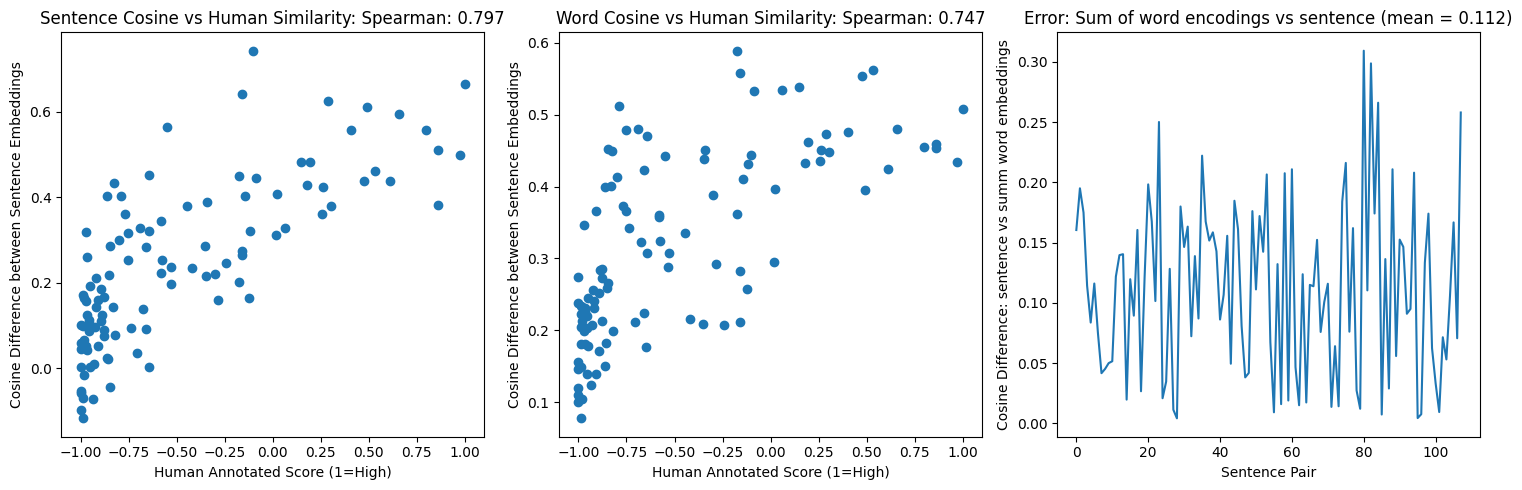

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].scatter(main_dataset['score'], main_dataset['SENT_sent_sim'])
axs[0].set_title("Sentence Cosine vs Human Similarity: Spearman: " +
                str(round(main_dataset['score'].corr(main_dataset['SENT_sent_sim'], method='spearman'), 3)))
axs[0].set_xlabel("Human Annotated Score (1=High)")
axs[0].set_ylabel("Cosine Difference between Sentence Embeddings")


axs[1].scatter(main_dataset['score'], main_dataset['ave'])
axs[1].set_title("Word Cosine vs Human Similarity: Spearman: " +
                str(round(main_dataset['score'].corr(main_dataset['ave'], method='spearman'), 3)))
axs[1].set_xlabel("Human Annotated Score (1=High)")
axs[1].set_ylabel("Cosine Difference between Sentence Embeddings")


axs[2].plot(np.sqrt((main_dataset['SENT_sent_sim'] - main_dataset['ave']) ** 2))
axs[2].set_title("Error: Sum of word encodings vs sentence (mean = " +
                str(np.round(np.sqrt((main_dataset['SENT_sent_sim'] - main_dataset['ave']) ** 2).mean(), 3)) + ")")
axs[2].set_xlabel("Sentence Pair")
axs[2].set_ylabel("Cosine Difference: sentence vs summ word embeddings")

plt.tight_layout()

plt.show()

In [ ]:
def DimReduceByPCA(input_array, new_dims):
	#Pick new_dims Eigenvectors
	pca = PCA(n_components = new_dims)
	pca.fit(input_array)
	data_pca = pca.transform(input_array)
	return data_pca

def DimReduceBySVD(input_array, new_dims):
    U, D, Vt = np.linalg.svd(input_array)
    U_reduced = U[:, :new_dims]
    A_reduced = np.dot(U_reduced, np.diag(D))
    return A_reduced

def RotateWordVector(input_word_vector):
	#Define word as a similarity vector compared to all the other words in corpus
	rotated_word_vector = np.zeroes(len(unique_word_list))
	for index, comaprison_word in enumerate(unique_word_list):
		rotated_word_vector[index] = (1-cosine(input_word_vector, embedder.encode(comaprison_word)))
	return rotated_word_vector

In [ ]:
#Making a dict of words as keys do our dimensionality vectors: {word: {dim_method : vector}}
corpus_array = np.zeros(shape=(len(unique_word_list), 384))
word_vector_dict = {}
for i, word in enumerate(unique_word_list):
		vector = embedder.encode(word)
		word_vector_dict.update({word: {len(vector):vector}})
		corpus_array[i] = vector

for j in range(12):
	pca_dim = j
	pca = DimReduceByPCA(corpus_array, pca_dim)
	for i, word in enumerate(unique_word_list):
			word_vector_dict[word].update({"pca_"+str(pca_dim):pca[i]})

,score,range,SENT_sent_sim,SENT_sub_sim,SENT_verb_sim,SENT_obj_sim,ave,PCA_11
score,1.000000,0.858698,0.797066,0.630270,0.458983,0.558049,0.746846,0.560750
range,0.858698,1.000000,0.598361,0.403131,0.446381,0.495584,0.580353,0.425979
SENT_sent_sim,0.797066,0.598361,1.000000,0.786958,0.420281,0.632657,0.864033,0.732926
SENT_sub_sim,0.630270,0.403131,0.786958,1.000000,0.245219,0.418000,0.784862,0.626439
SENT_verb_sim,0.458983,0.446381,0.420281,0.245219,1.000000,0.218815,0.623512,0.463081
SENT_obj_sim,0.558049,0.495584,0.632657,0.418000,0.218815,1.000000,0.713626,0.548963
ave,0.746846,0.580353,0.864033,0.784862,0.623512,0.713626,1.000000,0.765288
PCA_11,0.560750,0.425979,0.732926,0.626439,0.463081,0.548963,0.765288,1.000000


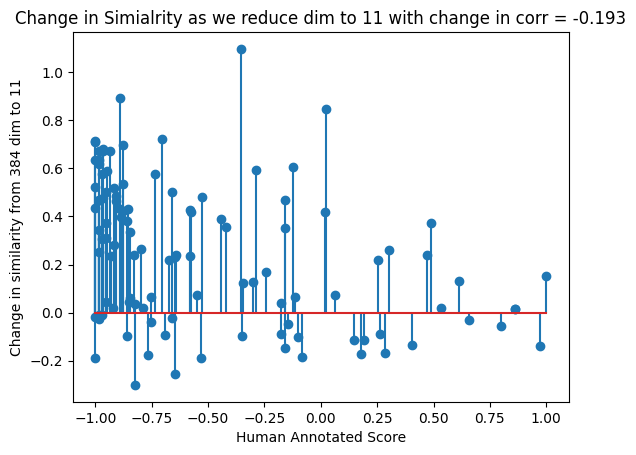

In [ ]:
similarities = []
for ind, row in main_dataset.iterrows():
	rows_embeddings = []
	sent1 = word_vector_dict[row['subject1']][384] + word_vector_dict[row['verb1']][384] + word_vector_dict[row['object1']][384]
	sent2 = word_vector_dict[row['subject2']][384] + word_vector_dict[row['verb2']][384] + word_vector_dict[row['object2']][384]

	sent1_low_dim = word_vector_dict[row['subject1']]["pca_"+str(pca_dim)] + word_vector_dict[row['verb1']]["pca_"+str(pca_dim)] + word_vector_dict[row['object1']]["pca_"+str(pca_dim)]
	sent2__low_dim = word_vector_dict[row['subject2']]["pca_"+str(pca_dim)] + word_vector_dict[row['verb2']]["pca_"+str(pca_dim)] + word_vector_dict[row['object2']]["pca_"+str(pca_dim)]
	similarities.append([1-cosine(sent1, sent2), 1-cosine(sent1_low_dim, sent2__low_dim)])

similarities = np.array(similarities)
plt.stem(main_dataset['score'], similarities[:,0]-similarities[:,1])
plt.title("Change in Simialrity as we reduce dim to "+str(pca_dim) +" with change in corr = "+str(
	np.round(main_dataset['score'].corr(pd.Series(similarities[:,1]), method='spearman') - main_dataset['score'].corr(pd.Series(similarities[:,0]), method='spearman'), 3)
	))
plt.xlabel("Human Annotated Score")
plt.ylabel("Change in similarity from 384 dim to "+str(pca_dim))

main_dataset['PCA_'+str(pca_dim)] = similarities[:,1]
main_dataset.corr(numeric_only = True, method='spearman')

In [ ]:
word_vector_dict['agent']

{384: array([-0.024892  , -0.35199907, -0.3820459 , -0.63825375, -0.08675867,
         0.05312683,  1.215866  , -0.18253447, -0.20966655,  0.13918944,
         0.5322978 ,  0.09031656,  0.15797564,  0.20573531,  0.38095418,
         0.6453262 ,  0.27371374,  0.08803058, -0.4790629 ,  0.11281575,
         0.26898906, -0.04510323,  0.00595768, -0.30830577, -0.23318718,
        -0.3925239 , -0.07737298, -0.0202356 , -0.22112383, -0.4360511 ,
         0.36978903, -0.50094193, -0.6550148 ,  0.18702137,  0.26188624,
         0.21067762, -0.9755955 , -0.11223873,  0.57111603,  0.01407279,
         0.5082024 , -0.08266035,  0.01432612,  0.05869436, -0.52367985,
        -0.72093177, -0.06835098, -0.13416931, -0.17163272, -0.34426013,
        -0.49943838, -0.32222572, -0.24706651,  0.06786991, -0.08893015,
        -0.3548589 ,  0.21553509,  0.69980305, -0.12534128, -0.2088347 ,
         0.11142949,  0.4022334 , -0.42174852,  0.5569677 , -0.94964784,
        -0.004314  , -0.64323616, -0.7905796 ,

In [ ]:
def retrive_nth_rows_sentences(data, row1, row2=None):
    if not row2:
        row2=row1
    sentence1 = data['subject'+str(1)][row1] + " " + data['verb'+str(1)][row1]  + " " + data['object'+str(1)][row1]
    sentence2 = data['subject'+str(2)][row2] + " " + data['verb'+str(2)][row2]  + " " + data['object'+str(2)][row2]
    return sentence1, sentence2

In [ ]:
def make_sentence_a_state(sentence):
    diagram = diagram_to_sentence(sentence.split(" "))
    diagram = remove_cups(diagram)
    return diagram

In [ ]:
def make_diagram_a_circuit(diagram, ansatz, dagger=False):
    discopy_circuit = ansatz(diagram)
    if dagger:
        discopy_circuit = discopy_circuit.dagger()
    return discopy_circuit

In [ ]:
def concat_circuits_into_inner_product(circuit1, circuit2):
    concat_circuit = circuit1 >> circuit2
    return concat_circuit

In [ ]:
def make_diagrams(data, sentence1, sentence2=None):
    if type(sentence1) == int:
        sentence1, sentence2 = retrive_nth_rows_sentences(data, sentence1, sentence2)
    diagram1 = make_sentence_a_state(sentence1)
    diagram2 = make_sentence_a_state(sentence2)
    return diagram1, diagram2

In [ ]:
def diagram_to_sentence(word_list):
    n, s = Ty('n'), Ty('s')
    words = [
        Word(word_list[0], n),
        Word(word_list[1], n.r @ s @ n.l),
        Word(word_list[2], n)
    ]
    cups = Cup(n, n.r) @ Id(s) @ Cup(n.l, n)
    assert Id().tensor(*words) == words[0] @ words[1] @ words[2]
    assert Ty().tensor(*[n.r, s, n.l]) == n.r @ s @ n.l
    diagram = Id().tensor(*words) >> cups
    return diagram

In [ ]:
def plot_model_over_training(trainer):
    """
    Plots the training of a model in two graphs:
        - Traing Loss vs validation Loss, colour is epoch
        - Two Losses against epochs.
    """
    epoch_count = range(trainer.epochs)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    fig.figsize=(20,10)

    ax1.scatter(trainer.val_costs,trainer.train_epoch_costs,c=epoch_count, cmap='gray')
    ax1.set_xlabel("Validation Loss")
    ax1.set_ylabel("Training Loss")
    ax1.set_title("Loss of Validation and Training, should be a nice curve")

    ax2.set_title("Train & Val Losses")
    ax2.plot(epoch_count, trainer.val_costs, label = 'Validate')
    ax2.plot(epoch_count, trainer.train_epoch_costs, label = 'Train')
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Loss")
    ax2.legend()
    fig.show()

In [ ]:
def retrive_word_param_from_symbols(word_symbol, noun_parameters, subject_parameters):
    word = word_symbol.name.split("_")
    word_string = word[0]
    word_type = word[-2]
    if word_type == "n":
        word_dims = noun_parameters
    elif "@" in word_type:
        word_dims = subject_parameters #Dynamically calc these later
    word_index = int(word[-1])
    return word_string, word_dims, word_index


In [ ]:
def get_word_dims_from_ansatz(ANSATZ):
    noun = ANSATZ.ob_map[Ty('n')]
    sent = ANSATZ.ob_map[Ty('s')]
    if isinstance(ANSATZ, IQPAnsatz):
        noun_parameters = 3 if noun == 1 else (noun-1)
        subject_parameters = noun + noun + sent - 1
        return noun_parameters, subject_parameters
    if isinstance(ANSATZ, Sim14Ansatz):
        noun_parameters = 3 if noun == 1 else noun*4
        subject_parameters = 4*(noun + noun + sent)
        return noun_parameters, subject_parameters
    if isinstance(ANSATZ, Sim15Ansatz):
        noun_parameters = 3 if noun == 1 else noun*2
        subject_parameters = 2*(noun + noun + sent)
        return noun_parameters, subject_parameters
    if isinstance(ANSATZ, StronglyEntanglingAnsatz):
        print("ERROR NOT IMPLEMENTED YET")
        pass

In [ ]:
def pca_to_rotations(symbols):
    noun_parameters, subject_parameters = get_word_dims_from_ansatz(ANSATZ)

    weights = np.zeros(shape=(len(symbols)))
    for i, word_symbol in enumerate(symbols):
        word_string, word_dims, word_index = retrive_word_param_from_symbols(word_symbol, noun_parameters, subject_parameters)
        weights[i] = word_vector_dict[word_string]['pca_'+str(word_dims)][word_index]/(2*np.pi)
    return weights

In [ ]:
def normal_distribution_to_rotations(symbols):
    noun_parameters, subject_parameters = get_word_dims_from_ansatz(ANSATZ)

    weights = np.zeros(shape=(len(symbols)))
    for i, word_symbol in enumerate(symbols):
        word_string, word_dims, word_index = retrive_word_param_from_symbols(word_symbol, noun_parameters, subject_parameters)

        mean_of_word = word_vector_dict[word_string][384].mean()
        std_of_word = word_vector_dict[word_string][384].std()
        s = np.random.normal(mean_of_word, std_of_word, 1)

        weights[i] = s
    return weights

In [ ]:
def make_circuit_from_diagrams(diagram1, diagram2, ansatz, drawing=False):
    discopy_circuit1 = make_diagram_a_circuit(diagram1, ansatz)
    discopy_circuit2 = make_diagram_a_circuit(diagram2, ansatz, dagger=True)
    discopy_circuit = concat_circuits_into_inner_product(discopy_circuit1, discopy_circuit2)

    if drawing:
        discopy_circuit1.draw(figsize=(10, 10))
        discopy_circuit2.draw(figsize=(5, 5))
        discopy_circuit.draw(figsize=(5, 10))

    pennylane_circuit = discopy_circuit.to_pennylane()
    return pennylane_circuit, discopy_circuit

In [ ]:
def make_circuit_from_df_row(data, row_number, ansatz):
    diagram1, diagram2 = make_diagrams(data, row_number)
    qml_circuit, discopy_circuit = make_circuit_from_diagrams(diagram1, diagram2, ansatz, False)
    return qml_circuit, discopy_circuit

sentence1 = "cat chase mouse"
sentence2 = "man eat hat"
qubits_noun=2
qubits_sentence=1
upload_count=1

In [ ]:
!pip install python-abc

  Preparing metadata (setup.py) ... done
  Created wheel for python-abc: filename=python_abc-0.2.0-py3-none-any.whl size=7513 sha256=e2470561e05e3570e9d0dd967a37cb2f6b9988d6470326b53c382d8642f4ce39
  Stored in directory: /root/.cache/pip/wheels/c6/d3/98/596bf4f27431f053215764ca9886cfc4216e1a62e827de2c9a
Successfully built python-abc


In [ ]:
from abc import ABC, abstractmethod

In [ ]:
from functools import wraps

In [ ]:
ansatz = StronglyEntanglingAnsatz({AtomicType.NOUN: 2, AtomicType.SENTENCE: 1}, n_layers=1)

In [ ]:
diagram1 = (main_dataset, sentence1)

In [ ]:
diagram2 = (main_dataset, sentence2)

In [ ]:
def plot_model_over_training(trainer):
    """
    Plots the training of a model in two graphs:
        - Traing Loss vs validation Loss, colour is epoch
        - Two Losses against epochs.
    """
    epoch_count = range(trainer.epochs)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    fig.figsize=(20,10)

    ax1.scatter(trainer.val_costs,trainer.train_epoch_costs,c=epoch_count, cmap='gray')
    ax1.set_xlabel("Validation Loss")
    ax1.set_ylabel("Training Loss")
    ax1.set_title("Loss of Validation and Training, should be a nice curve")

    ax2.set_title("Train & Val Losses")
    ax2.plot(epoch_count, trainer.val_costs, label = 'Validate')
    ax2.plot(epoch_count, trainer.train_epoch_costs, label = 'Train')
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Loss")
    ax2.legend()
    fig.show()

class EncodedNumpyModel(NumpyModel):
     def initialise_weights(self, param_initialise_method) -> None:
        """
        Initialise the weights of the model.

        Raises
        ------
        ValueError
            If `model.symbols` are not initialised.
        """
        if self.param_initialise_method is not None:
            if not self.symbols:
                raise ValueError('Symbols not initialised. Instantiate through '
                                '`from_diagrams()`.')
            self.weights = param_initialise_method(self.symbols)

In [ ]:
BATCH_SIZE = 2
EPOCHS = 2000
SEED = 42
NOUN_QUBIT_COUNT = 1
SENTENCE_QUBIT_COUNT = 3
ANSATZ_PARAM = {AtomicType.NOUN: NOUN_QUBIT_COUNT, AtomicType.SENTENCE: SENTENCE_QUBIT_COUNT}
ANSATZ = IQPAnsatz(ANSATZ_PARAM, n_layers=1)
OPTIMIZER_PARAM = {'a': 0.75, 'c': 0.1, 'A':0.01*EPOCHS}
DIMS_OF_MOST_ACCURATE_MODEL = 384

identifier = '' #Write description of model here
string_identifier = identifier + str(NOUN_QUBIT_COUNT)+'_'+str(SENTENCE_QUBIT_COUNT) +'_'+str(EPOCHS)+'_'+str(BATCH_SIZE)+'_'+ str(SEED)+"_"+'_'.join(str(obj) for obj in [str(i) for i in OPTIMIZER_PARAM.values()])

epoch_count = np.array([i for i in range(0, EPOCHS)])

class EncodedNumpyModel(NumpyModel):
     def initialise_weights(self) -> None:
        """
        Initialise the weights of the model.

        Raises
        ------
        ValueError
            If `model.symbols` are not initialised.
        """
        if not self.symbols:
            raise ValueError('Symbols not initialised. Instantiate through '
                            '`from_diagrams()`.')
        self.weights = self.param_initialise_method(self.symbols)

torch.manual_seed(SEED)
random.seed(SEED)
np.random.seed(SEED)

def map_optimiser_to_string(val):
    if type(val) == type(SPSAOptimizer):
        return "SPSA"

def map_ansatz_to_string(val):
    if type(val) == IQPAnsatz:
        return "IQP"
    if type(val) == Sim15Ansatz:
        return "Sim15"
    if type(val) == Sim14Ansatz:
        return "Sim14"
    if type(val) == StronglyEntanglingAnsatz:
        return "StronglyEntangling"


def map_loss_function_to_string(val):
    if type(val) == type(MSELoss):
        return "MSE"

GLOBAL_MODEL_PARAMETERS = {#Makes it clear that parameters are not changed at all throughout
        "BATCH_SIZE":BATCH_SIZE,
        "EPOCHS":EPOCHS,
        "SEED":SEED,
        "ANSATZ":ANSATZ,
        "NOUN_QUBIT_COUNT":NOUN_QUBIT_COUNT,
        "VERB_QUBIT_COUNT":SENTENCE_QUBIT_COUNT,
        #"LOSS_FUNCTION":LOSS_FUNCTION,
        #"OPTIMISER":OPTIMISER,
        #"OPTIMISER_PARAM": OPTIMISER_PARAM
    }

def generate_unique_model_filename(MODEL_TYPE_string):
    unique_parameters_string = "models"+"/"
    unique_parameters_string += str(MODEL_TYPE_string)
    for key, val in GLOBAL_MODEL_PARAMETERS.items():
        if key == "ANSATZ":
            val = map_ansatz_to_string(val)
        if key == "LOSS_FUNCTION":
            val = map_loss_function_to_string(val)
        if key == "OPTIMISER":
            val = map_optimiser_to_string(val)
        if key == "OPTIMISER_PARAM":
            val = '_'.join(str(obj) for obj in [str(i) for i in val.values()])
        unique_parameters_string += "_"+str(val)
    unique_parameters_string
    return unique_parameters_string

generate_unique_model_filename("random")

'models/random_2_2000_42_IQP_1_3'

In [ ]:
##################################

In [ ]:
from DataGenerate import *

word_pairs, word_pairs_annotations = GetWordPairs()
print("First 5 Word Pairs: ")
print(word_pairs[:5])

word_list = GetWords()
print("\nFirst 5 Words: ")
word_list[:5]

First 5 Word Pairs: 
[['party', 'government'], ['official', 'leader'], ['state', 'government'], ['control', 'intervention'], ['tax', 'interest']]

First 5 Words: 


['development', 'plan', 'action', 'training', 'education']

In [ ]:
from Models import W2VModel

dimensions = [10,20,30,40,50,60,70,80,90] + list(np.arange(100,800,100))
window = 5

for vector_dims in dimensions: W2VModel(vector_dims, window, printing=True)

W2V = W2VModel(768, 5)
print("First 10 dims of second word in 768 dims: ")
W2V.getvector(word_list[1])[:10]

Made Word2Vec Model of  10  dimensions and  5  window
Made Word2Vec Model of  20  dimensions and  5  window
Made Word2Vec Model of  30  dimensions and  5  window
Made Word2Vec Model of  40  dimensions and  5  window
Made Word2Vec Model of  50  dimensions and  5  window
Made Word2Vec Model of  60  dimensions and  5  window
Made Word2Vec Model of  70  dimensions and  5  window
Made Word2Vec Model of  80  dimensions and  5  window
Made Word2Vec Model of  90  dimensions and  5  window
Made Word2Vec Model of  100  dimensions and  5  window
Made Word2Vec Model of  200  dimensions and  5  window
Made Word2Vec Model of  300  dimensions and  5  window
Made Word2Vec Model of  400  dimensions and  5  window
Made Word2Vec Model of  500  dimensions and  5  window
Made Word2Vec Model of  600  dimensions and  5  window
Made Word2Vec Model of  700  dimensions and  5  window
First 10 dims of second word in 768 dims: 


array([-0.1084429 , -0.15007277, -0.03617815,  0.08663496,  0.05250105,
       -0.09421491, -0.12645926, -0.03476453, -0.14413661,  0.01337817],
      dtype=float32)